# 投资策略-step1

In [8]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Use 'prophet' instead of 'fbprophet'
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf



In [9]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler  # Important import for LSTM

In [10]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as web

# Define the start and end dates
end = datetime.datetime.today()
start = end - datetime.timedelta(days=3*365)  # Approximate 3 years

# Define a function to fetch data from FRED
def fetch_fred_data(symbol):
    try:
        data = web.DataReader(symbol, 'fred', start, end)
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching {symbol} from FRED: {e}")
        return pd.DataFrame()

# Custom fetch for certain indicators that may not work through FRED
def fetch_custom_data(url):
    try:
        response = requests.get(url)
        data = pd.read_csv(io.StringIO(response.text), parse_dates=['DATE'], index_col='DATE')
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching custom data: {e}")
        return pd.DataFrame()

# URLs for custom data
urls = {
    'VIX': 'https://raw.githubusercontent.com/plotly/datasets/master/vix.csv',
}

# Retrieve data for the indicators
indicators = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index
    'PPI': 'PPIACO',    # Producer Price Index
    'Federal Reserve Rate': 'FEDFUNDS',  # Federal Funds Rate
    'Treasury Yields': 'GS10',            # 10-Year Treasury Yield
    'NFP': 'PAYEMS',                      # Non-Farm Payrolls
    'Initial Jobless Claims': 'IC4WSA',  # Initial Jobless Claims
    'Consumer Confidence Index': 'UMCSENT',  # Consumer Confidence
    'Retail Sales Data': 'RSAFS',        # Retail Sales
    'PMI': 'IPMAN',                        # PMI
    'Housing Starts': 'HOUST',            # Housing Starts
    'VIX': '^VIX',                        # Volatility Index
    'PCE': 'PCE'                          # Personal Consumption Expenditures
}

# Create a dictionary to hold the data
data_frames = {}

# Fetch each indicator
for name, symbol in indicators.items():
    if symbol in urls:  # For custom URLs
        data = fetch_custom_data(urls[symbol])
    elif symbol.startswith('^'):  # For stock/market indices, use yfinance
        data = yf.download(symbol, start=start, end=end)['Close']
        data.index = pd.to_datetime(data.index)  # Ensure the index is a DatetimeIndex
        data = data.resample('M').mean()  # Resample to monthly
    else:  # For economic indicators, use FRED
        data = fetch_fred_data(symbol)

    if not data.empty:  # Only add non-empty DataFrames
        data_frames[name] = data

# Combine all data into a single DataFrame
combined_data = pd.concat(data_frames.values(), axis=1)
combined_data.columns = data_frames.keys()

# Display the combined DataFrame
print(combined_data.tail())


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/3531231996.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/3531231996.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/3531231996.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/3531231996.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9

                CPI      PPI  Federal Reserve Rate  Treasury Yields       NFP  \
2024-06-30  313.049  256.015                  5.33             4.31  158548.0   
2024-07-31  313.534  257.485                  5.33             4.25  158692.0   
2024-08-31  314.121  255.613                  5.33             3.87  158851.0   
2024-09-30      NaN      NaN                  5.13             3.72  159105.0   
2024-10-31      NaN      NaN                   NaN              NaN       NaN   

            Initial Jobless Claims  Consumer Confidence Index  \
2024-06-30                231500.0                       68.2   
2024-07-31                235687.5                       66.4   
2024-08-31                235200.0                       67.9   
2024-09-30                227125.0                        NaN   
2024-10-31                     NaN                        NaN   

            Retail Sales Data       PMI  Housing Starts        VIX      PCE  
2024-06-30           702350.0   99.9546     

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/3531231996.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data


In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Fill NaNs with forward fill
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)

# Prepare data for linear regression
X = np.arange(len(combined_data)).reshape(-1, 1)  # Time variable
forecasts = {}

# Linear Regression forecasts
for col in combined_data.columns:
    model = LinearRegression()
    model.fit(X, combined_data[col])
    future_X = np.arange(len(combined_data), len(combined_data) + 12).reshape(-1, 1)
    forecasts[col] = model.predict(future_X)

# Simple Moving Average function
def moving_average(data, window):
    return data.rolling(window=window).mean()

sma_forecasts = {}
# Calculate moving average forecasts
for col in combined_data.columns:
    sma_forecasts[col] = moving_average(combined_data[col], window=12).iloc[-1]  # Last SMA value

# Random Forest forecasts
rf_forecasts = {}
for col in combined_data.columns:
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X, combined_data[col])
    rf_forecasts[col] = model.predict(future_X)

# Final Forecasting (excluding LSTM)
final_forecast = {}

# Assuming equal weights for simplicity
for col in combined_data.columns:
    final_forecast[col] = (forecasts[col] + sma_forecasts[col] + rf_forecasts[col]) / 3  # Exclude LSTM

# Convert to DataFrame for easier viewing
final_forecast_df = pd.DataFrame(final_forecast, index=pd.date_range(start=combined_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))

# Display the final forecast DataFrame
print(final_forecast_df)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1939897321.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


                   CPI         PPI  Federal Reserve Rate  Treasury Yields  \
2024-11-30  315.145062  255.174715              5.783344         4.235558   
2024-12-31  315.463884  255.126129              5.840995         4.258131   
2025-01-31  315.782707  255.077542              5.898646         4.280704   
2025-02-28  316.101529  255.028956              5.956298         4.303276   
2025-03-31  316.420351  254.980370              6.013949         4.325849   
2025-04-30  316.739173  254.931784              6.071600         4.348422   
2025-05-31  317.057996  254.883197              6.129251         4.370994   
2025-06-30  317.376818  254.834611              6.186902         4.393567   
2025-07-31  317.695640  254.786025              6.244554         4.416140   
2025-08-31  318.014463  254.737439              6.302205         4.438713   
2025-09-30  318.333285  254.688852              6.359856         4.461285   
2025-10-31  318.652107  254.640266              6.417507         4.483858   

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1939897321.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  final_forecast_df = pd.DataFrame(final_forecast, index=pd.date_range(start=combined_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))


In [45]:
# Define major industry indices symbols
industry_indices = {
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI',
    'NASDAQ': '^IXIC',
    'Russell 2000': '^RUT',
    'Financials': 'XLF',
    'Healthcare': 'XLV',
    'Technology': 'XLK',
    'Communication': 'XLC',
    'Consumer Staple': 'XLP',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Real Estate': 'XLRE',
    'Energy':'XLE',
    'Utilities':'XLU',
    'Consumer Discretionary': 'XLY',
    'Gold':'GLD',
    'Long China' : 'MCHI',
    'Crude oil' : 'USO',
    'military': 'ITA'
}

# Fetch industry indices data
for name, symbol in industry_indices.items():
    data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
    if not data.empty:
        data_frames[name] = data

# Combine all data into a single DataFrame again
#industry_data = pd.concat(data_frames.values(), axis=1)
#industry_data.columns = data_frames.keys()

# Display the updated combined DataFrame
#print(industry_data.tail())


[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/977304435.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/977304435.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/977304435.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
[******

In [46]:
# Combine industry indices into the existing combined_data
for name, data in data_frames.items():
    combined_data[name] = data

# Drop NaNs by forward filling or interpolation
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/929932855.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


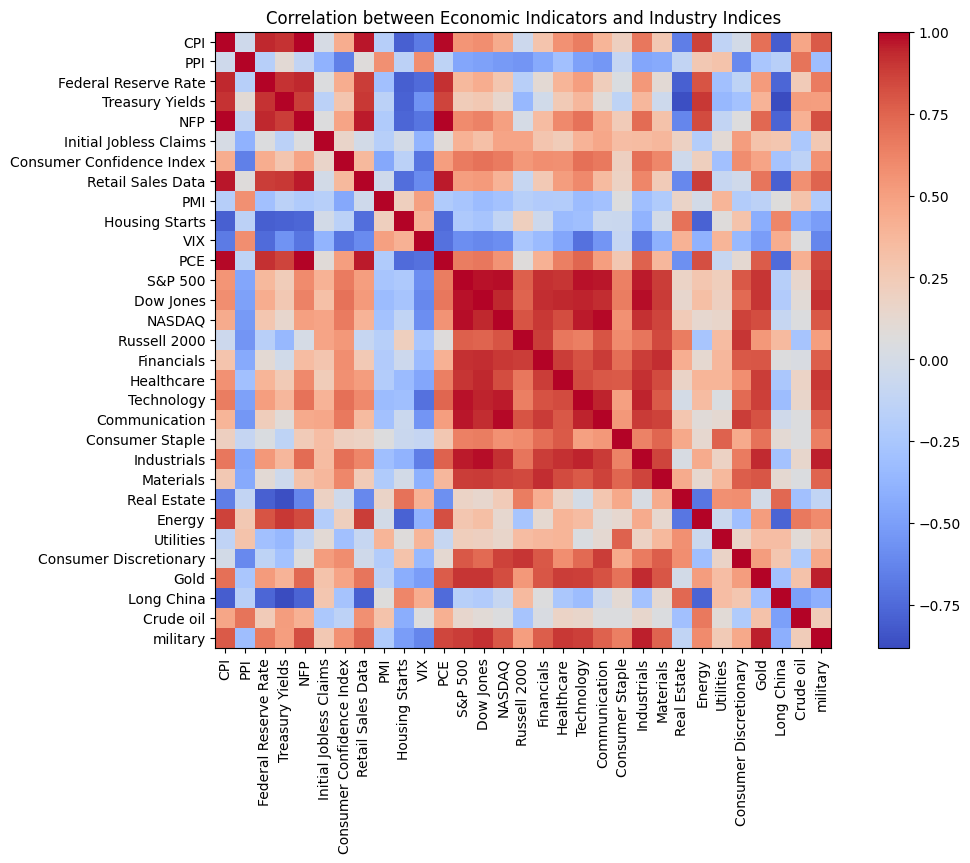

S&P 500 R^2 score: -8.975272248352399
Dow Jones R^2 score: -19.33002417283899
NASDAQ R^2 score: -1.1706654918643777
Russell 2000 R^2 score: -19.237599309865747
Financials R^2 score: -29.604946659343476
Healthcare R^2 score: -38.26661992637461
Technology R^2 score: 0.3390190522397968
Communication R^2 score: 0.20251098161333791
Consumer Staple R^2 score: -29.056172632193192
Industrials R^2 score: -20.91291091611976
Materials R^2 score: -83.01345350565335
Real Estate R^2 score: -5.437052562656568
Energy R^2 score: -60.00978549349417
Utilities R^2 score: -6.539074096450077
Consumer Discretionary R^2 score: -2.0380879907096574
Gold R^2 score: -2.698742575394576
Long China R^2 score: -0.6851678647853414
Crude oil R^2 score: -0.004430443530555106
military R^2 score: -6.456759381500927


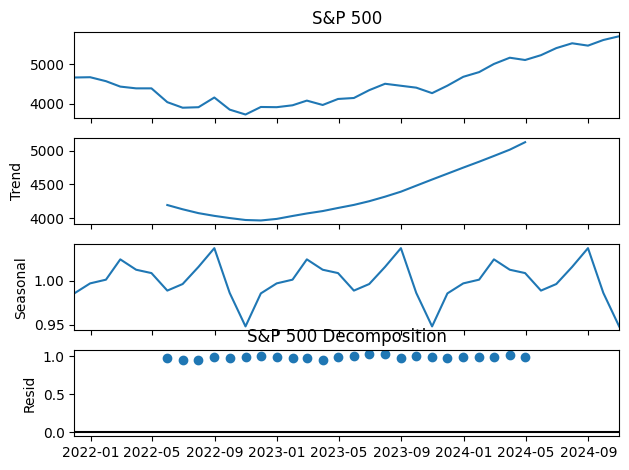

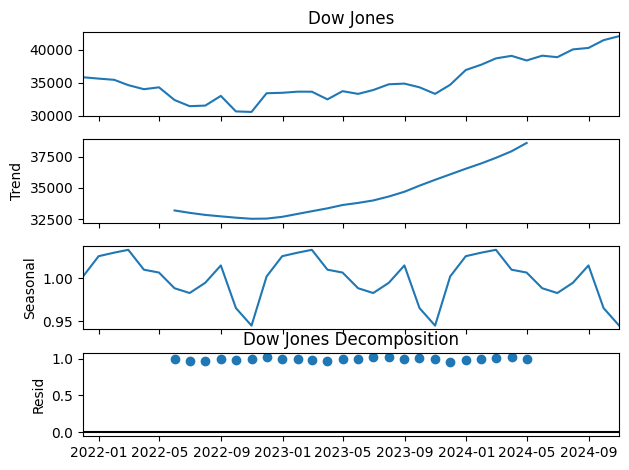

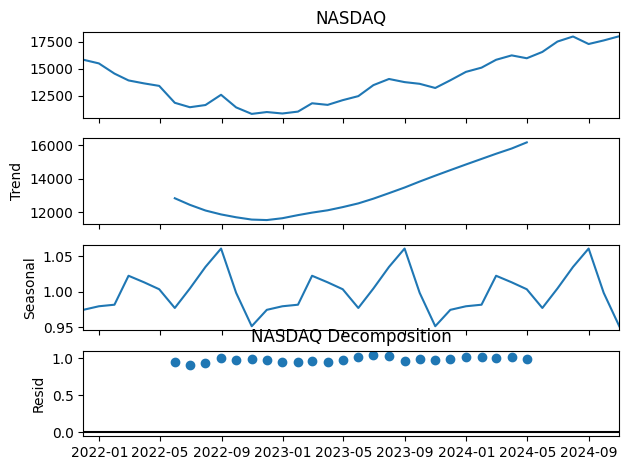

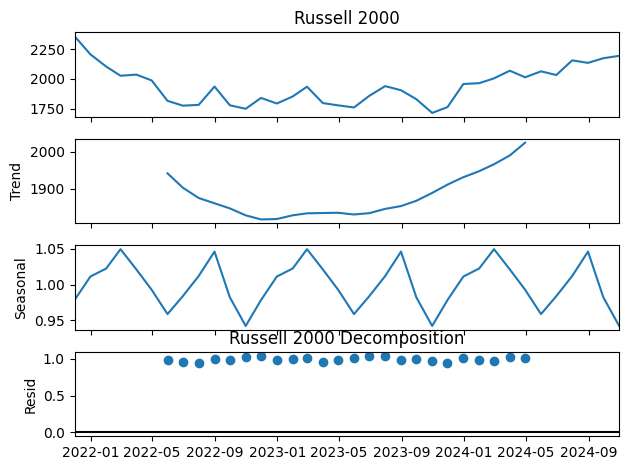

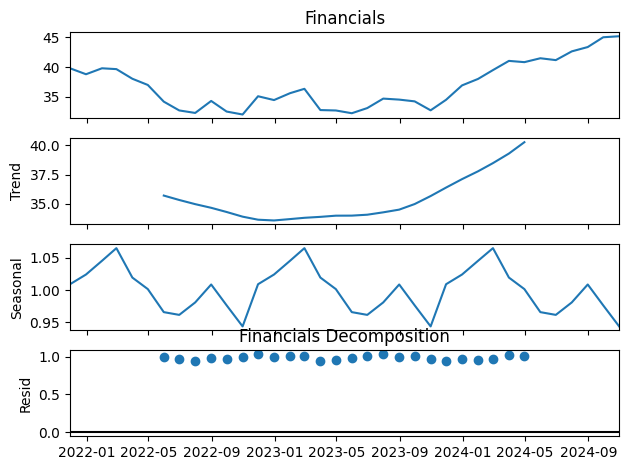

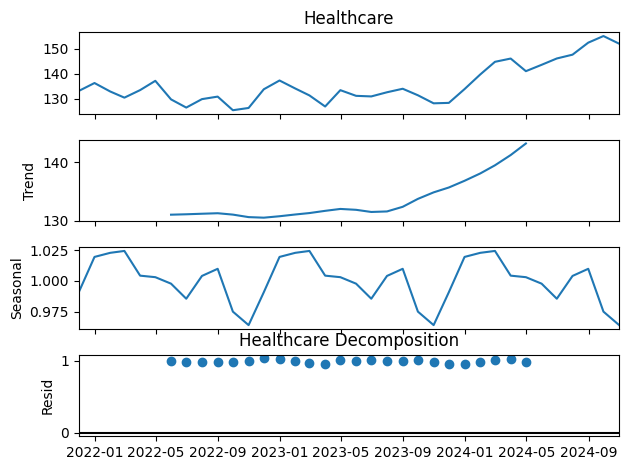

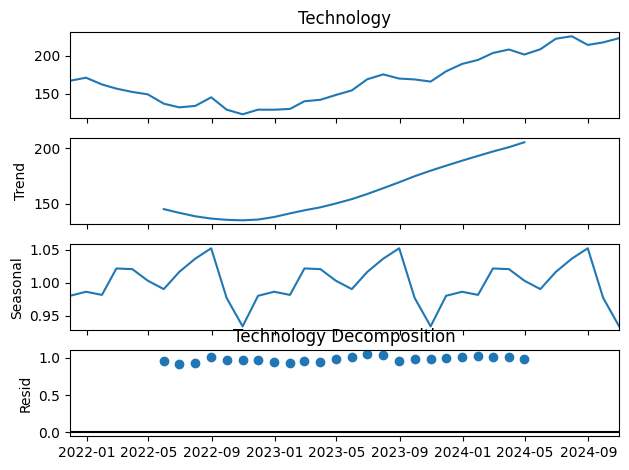

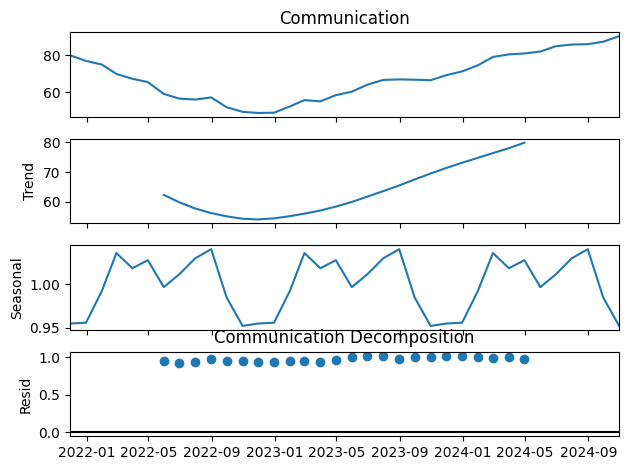

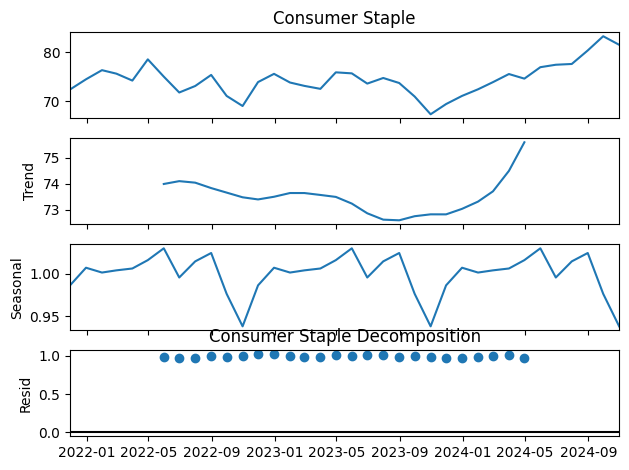

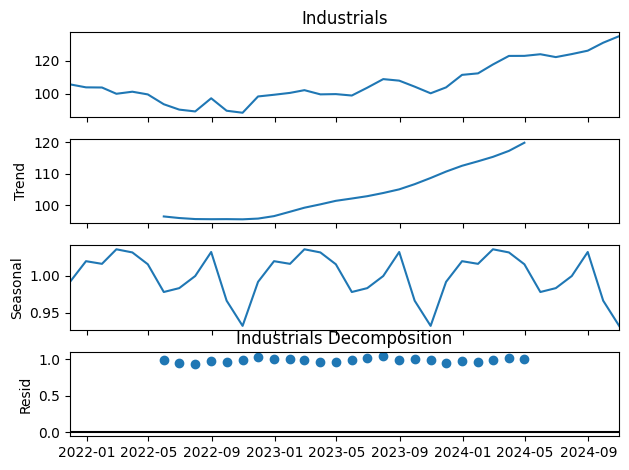

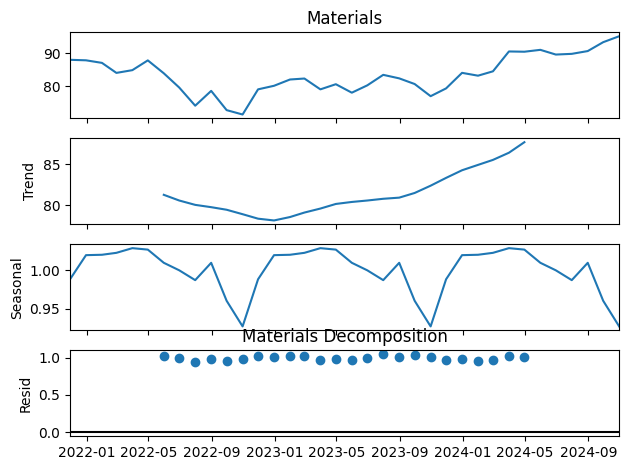

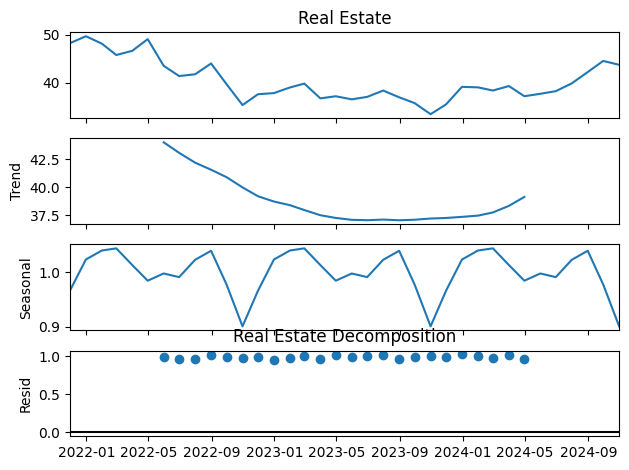

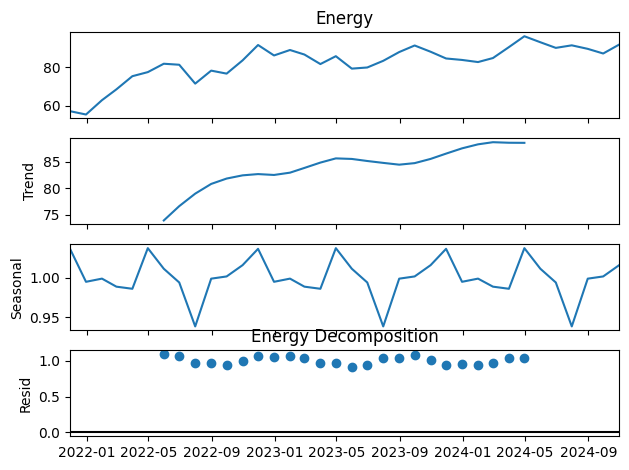

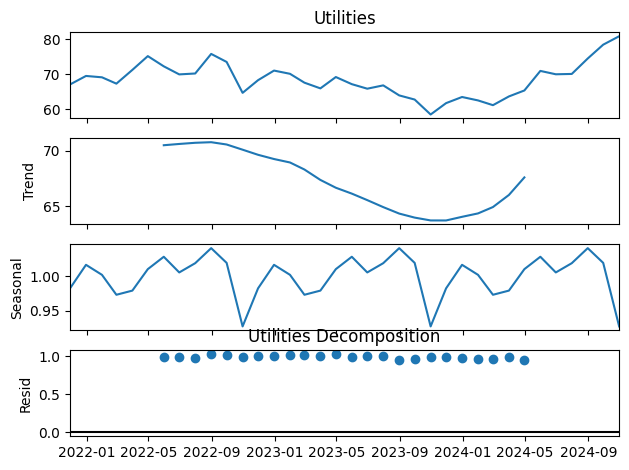

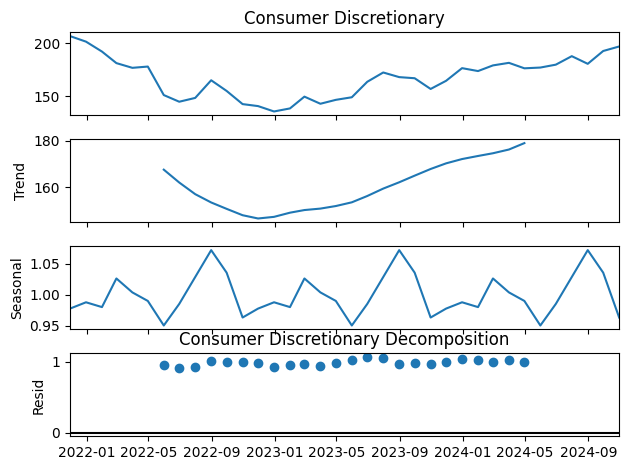

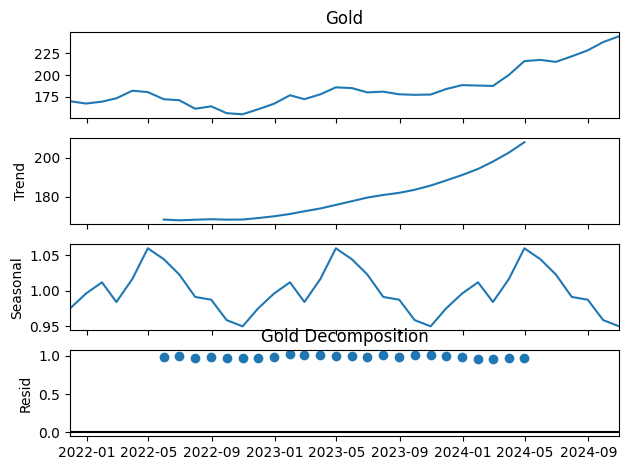

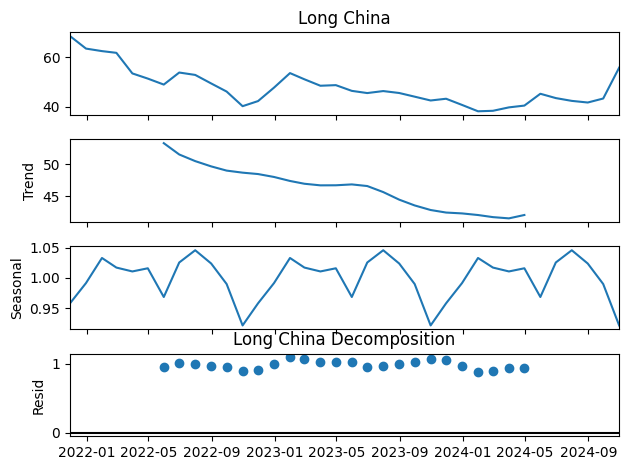

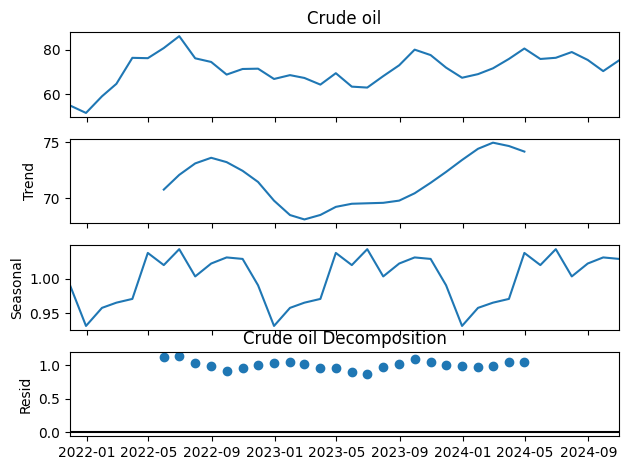

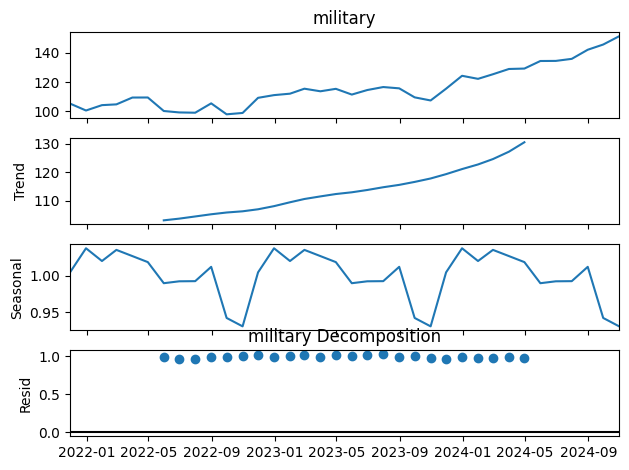

Granger Causality for S&P 500
CPI: p-values = [np.float64(0.3644), np.float64(0.2049)]
PPI: p-values = [np.float64(0.7803), np.float64(0.3625)]
Federal Reserve Rate: p-values = [np.float64(0.0), np.float64(0.0558)]
Treasury Yields: p-values = [np.float64(0.6482), np.float64(0.4838)]
NFP: p-values = [np.float64(0.6996), np.float64(0.2595)]
Initial Jobless Claims: p-values = [np.float64(0.2205), np.float64(0.5655)]
Consumer Confidence Index: p-values = [np.float64(0.3571), np.float64(0.0019)]
Retail Sales Data: p-values = [np.float64(0.3088), np.float64(0.0796)]
PMI: p-values = [np.float64(0.3747), np.float64(0.0121)]
Housing Starts: p-values = [np.float64(0.551), np.float64(0.9227)]
VIX: p-values = [np.float64(0.0937), np.float64(0.0787)]
PCE: p-values = [np.float64(0.9193), np.float64(0.8751)]
Granger Causality for Dow Jones
CPI: p-values = [np.float64(0.3127), np.float64(0.1666)]
PPI: p-values = [np.float64(0.9059), np.float64(0.4296)]
Federal Reserve Rate: p-values = [np.float64(0.0)

/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  war

PPI: p-values = [np.float64(0.0509), np.float64(0.0492)]
Federal Reserve Rate: p-values = [np.float64(0.4589), np.float64(0.0261)]
Treasury Yields: p-values = [np.float64(0.5871), np.float64(0.4424)]
NFP: p-values = [np.float64(0.3721), np.float64(0.4724)]
Initial Jobless Claims: p-values = [np.float64(0.9254), np.float64(0.8466)]
Consumer Confidence Index: p-values = [np.float64(0.1491), np.float64(0.0022)]
Retail Sales Data: p-values = [np.float64(0.8207), np.float64(0.7658)]
PMI: p-values = [np.float64(0.0301), np.float64(0.0054)]
Housing Starts: p-values = [np.float64(0.7488), np.float64(0.3962)]
VIX: p-values = [np.float64(0.0003), np.float64(0.001)]
PCE: p-values = [np.float64(0.4943), np.float64(0.3882)]
Granger Causality for Consumer Discretionary
CPI: p-values = [np.float64(0.3247), np.float64(0.0483)]
PPI: p-values = [np.float64(0.0731), np.float64(0.0733)]
Federal Reserve Rate: p-values = [np.float64(0.0), np.float64(0.0198)]
Treasury Yields: p-values = [np.float64(0.9604), 

/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  war

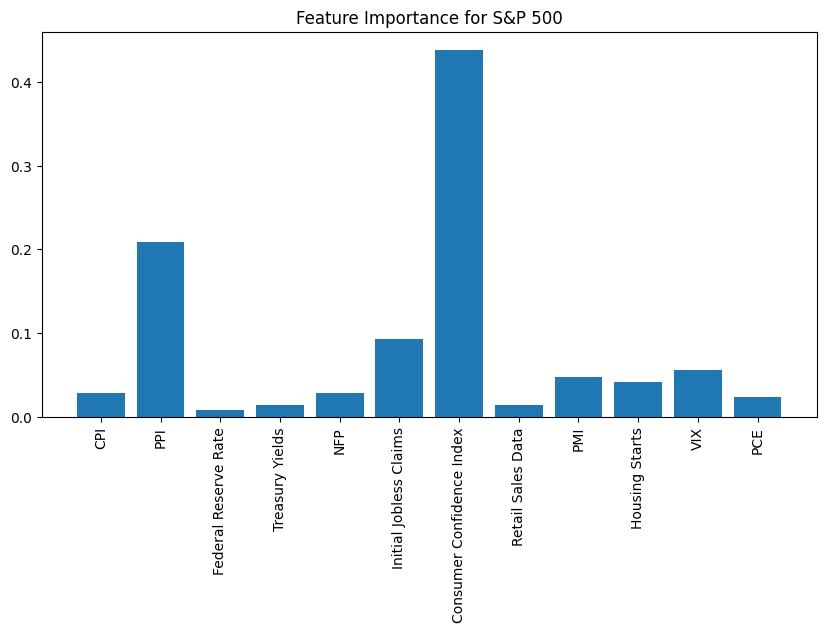

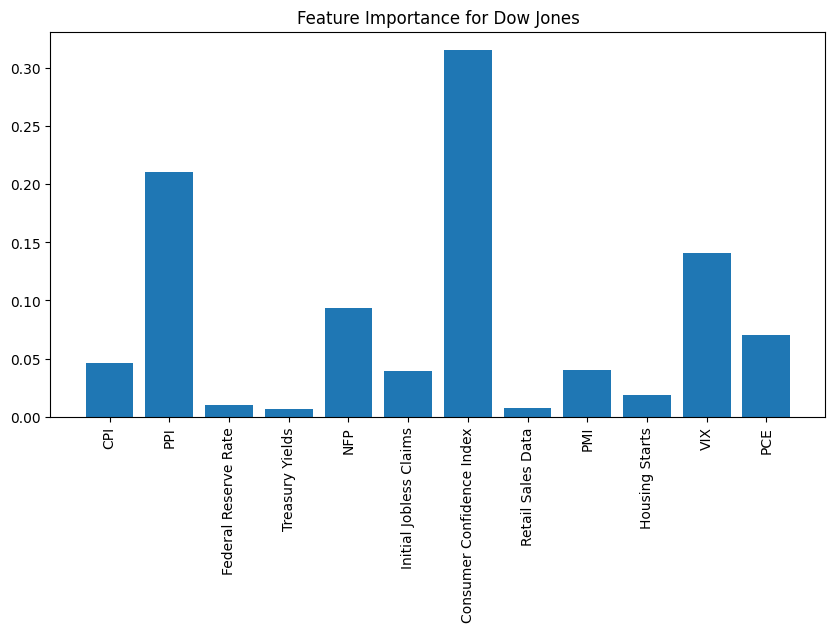

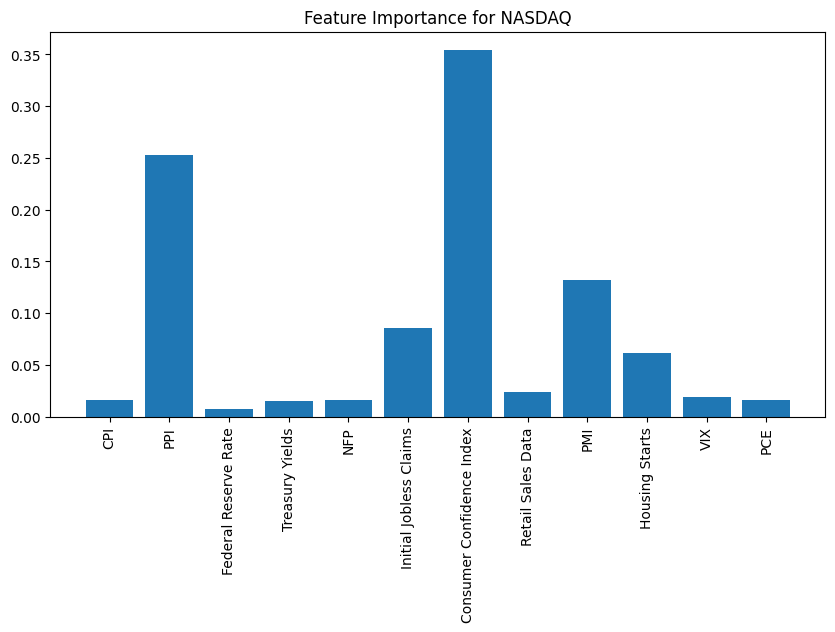

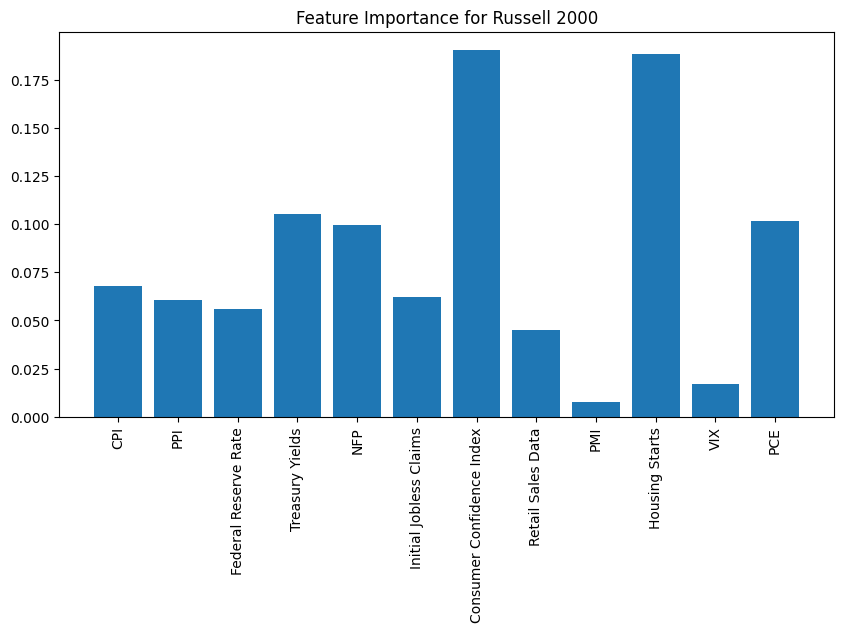

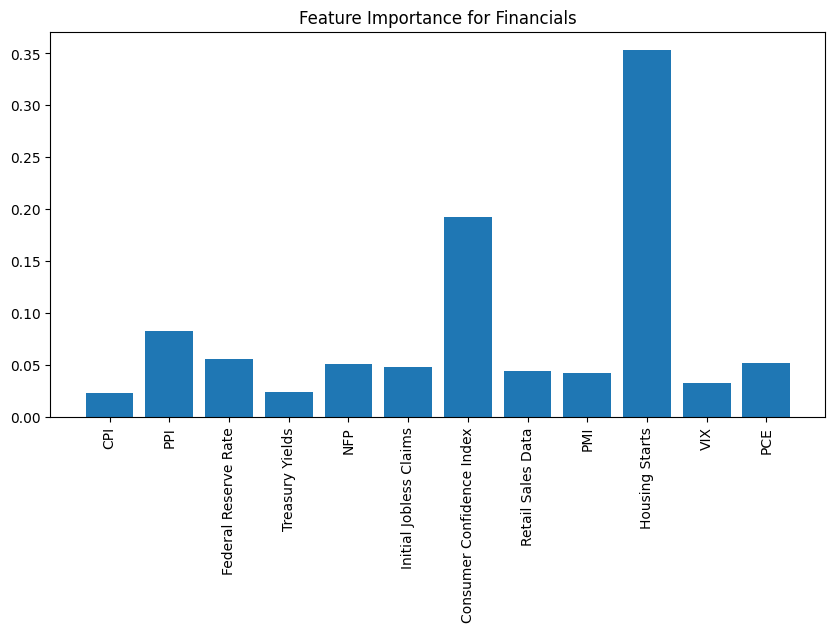

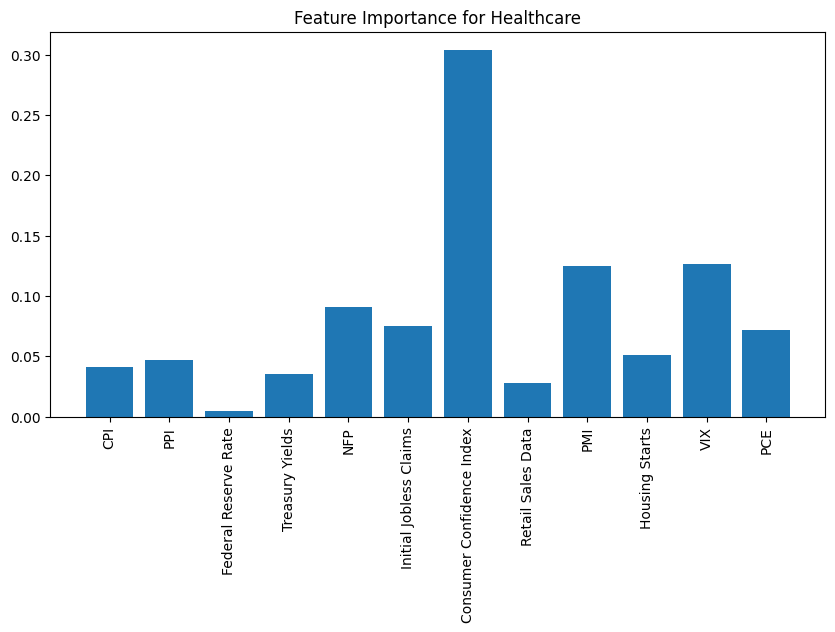

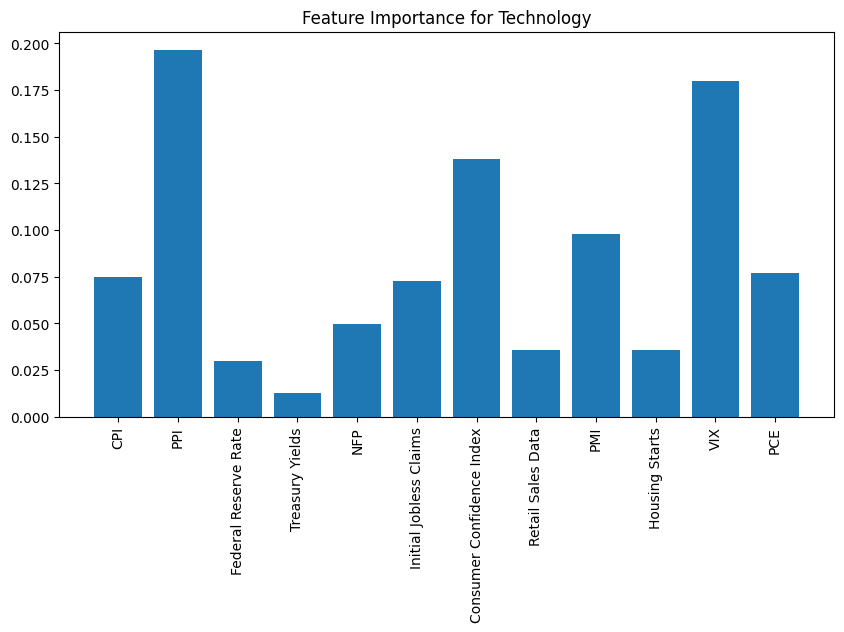

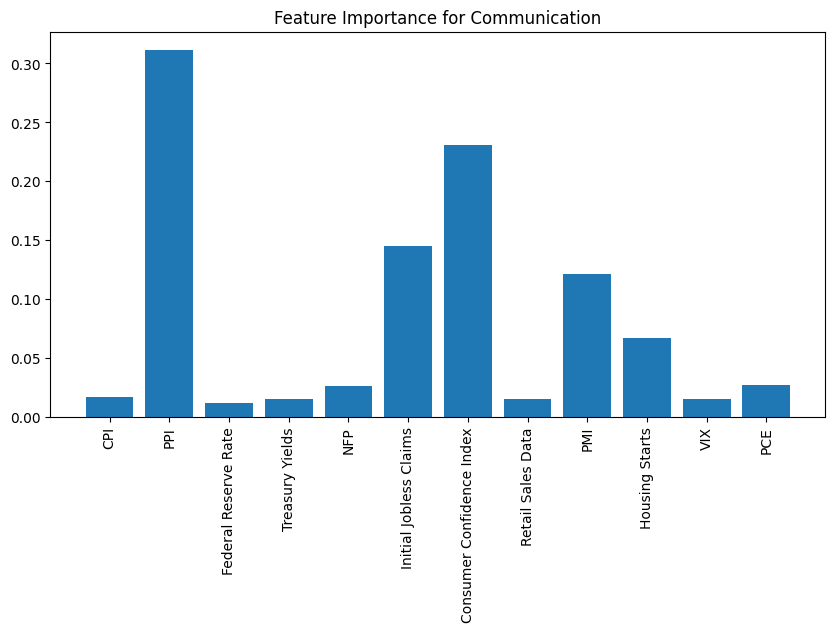

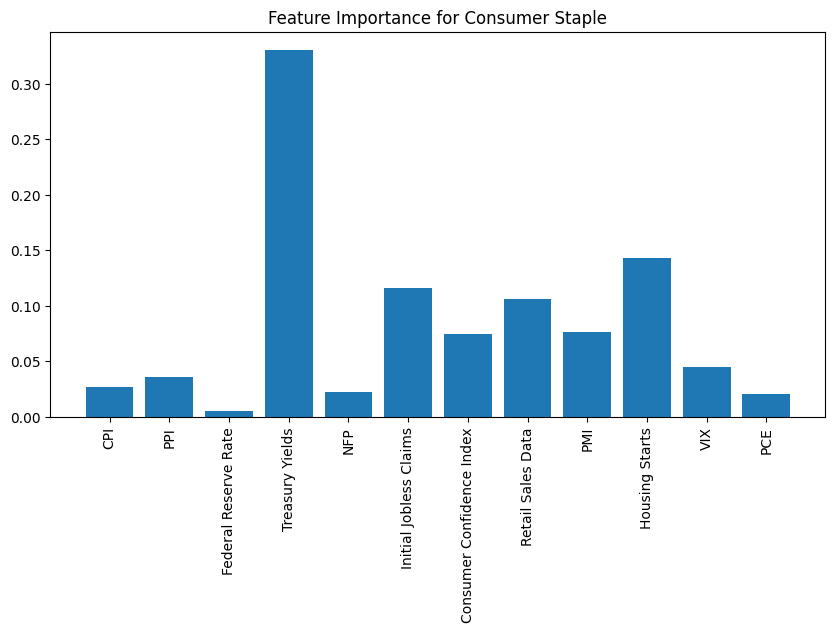

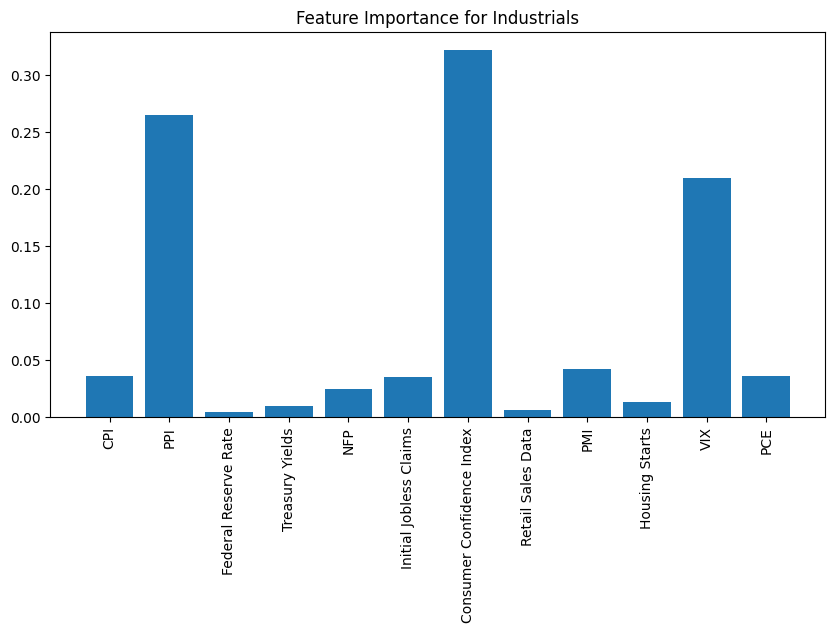

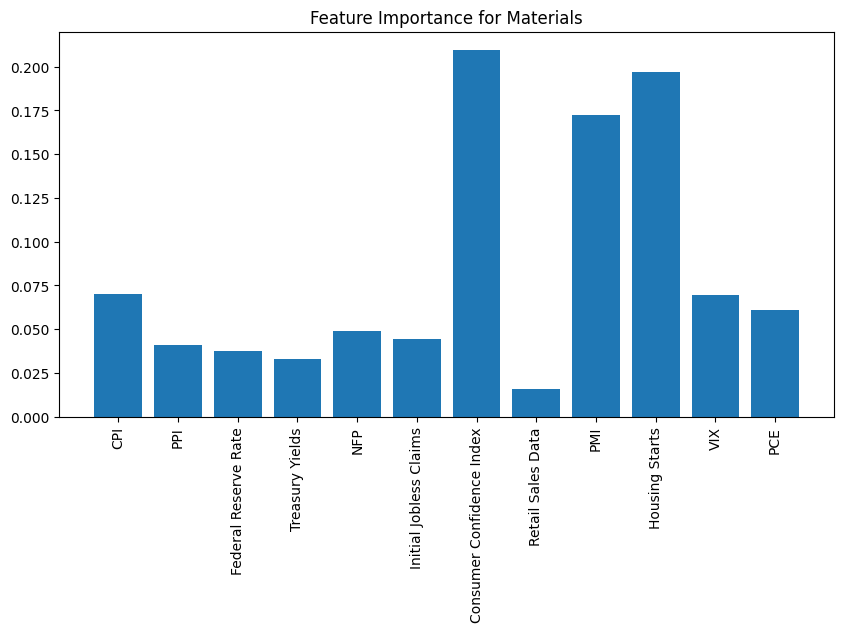

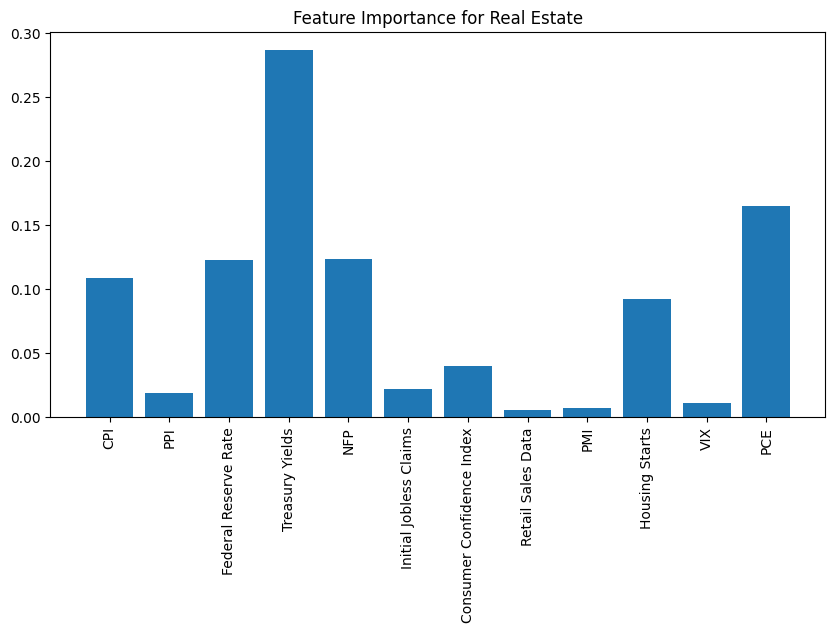

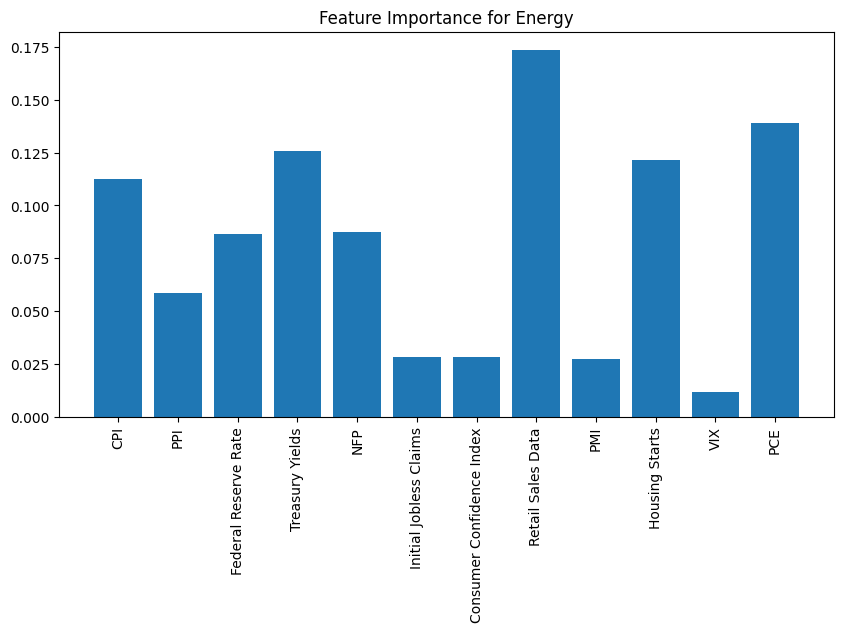

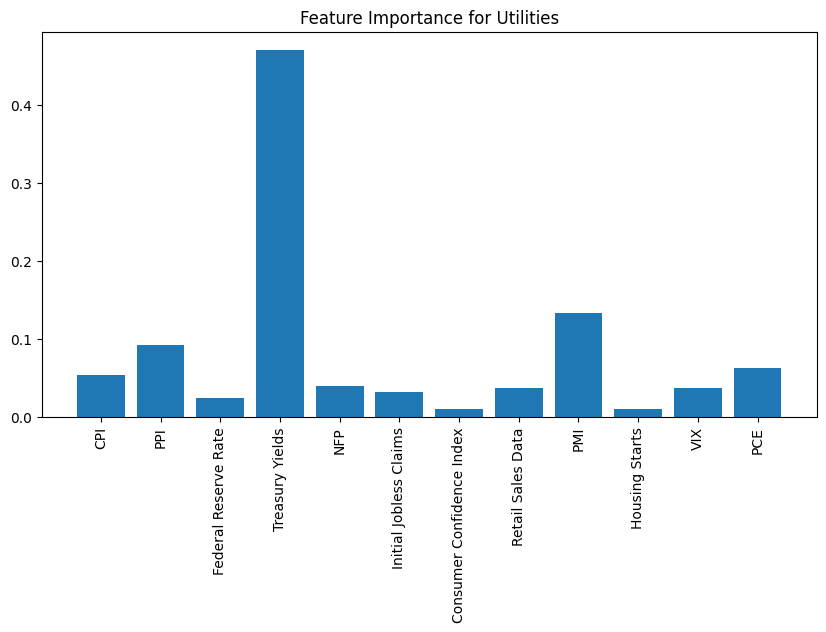

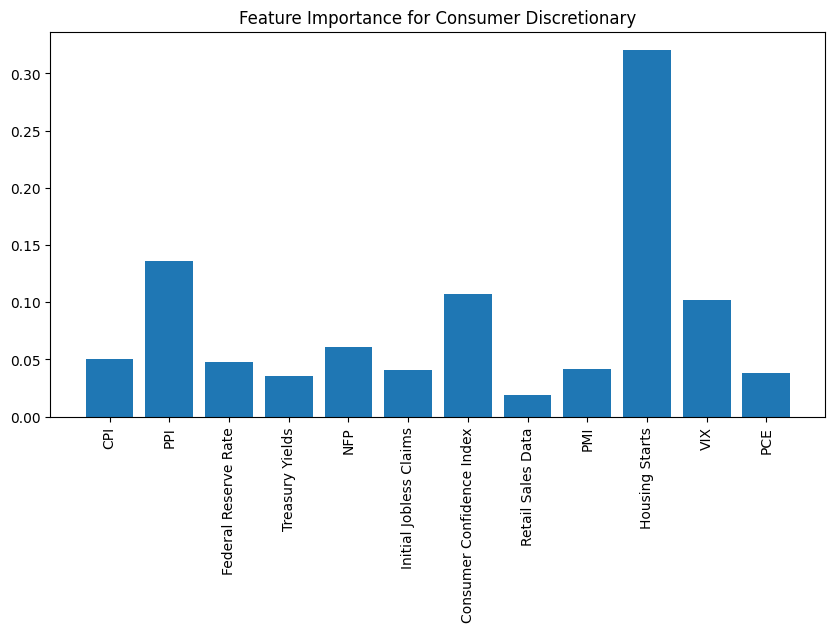

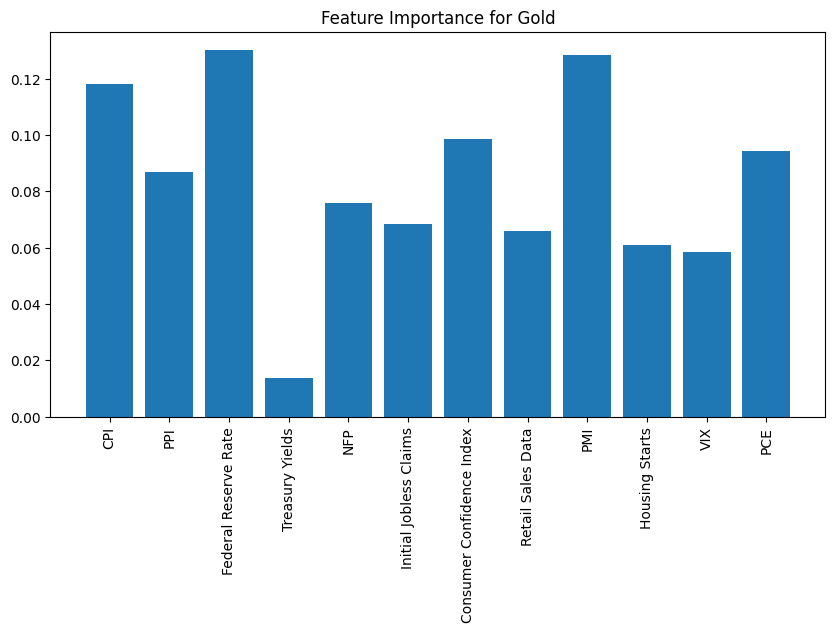

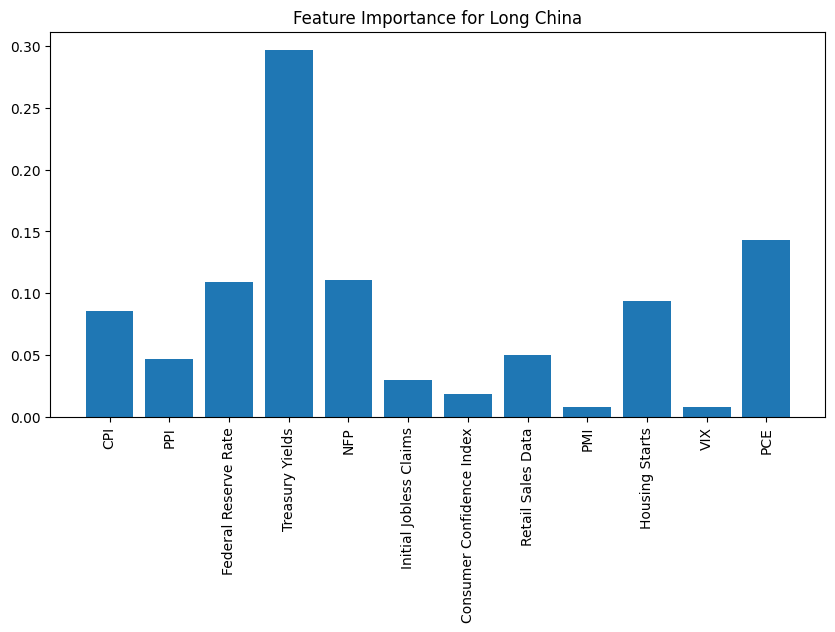

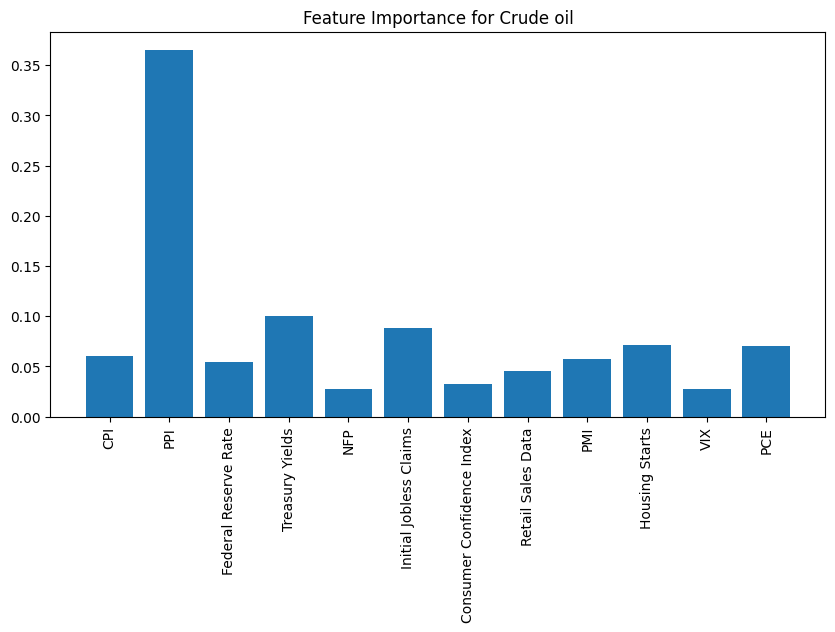

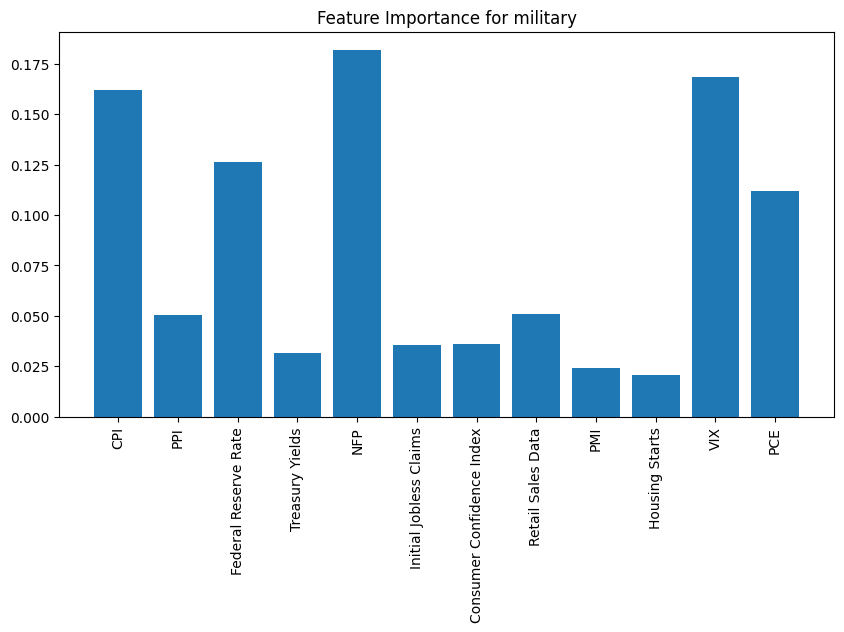

Top 3 promising industries: ['Technology', 'Communication', 'Crude oil', 'Long China', 'NASDAQ']


In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Correlation matrix
corr_matrix = combined_data.corr()

# Plot heatmap using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation between Economic Indicators and Industry Indices')
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

industry_forecast_results = {}
X = combined_data[indicators.keys()]  # Economic indicators
for industry in industry_indices.keys():
    y = combined_data[industry]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store R^2 score
    r2 = r2_score(y_test, y_pred)
    industry_forecast_results[industry] = r2
    print(f"{industry} R^2 score: {r2}")

from statsmodels.tsa.seasonal import seasonal_decompose

for industry in industry_indices.keys():
    result = seasonal_decompose(combined_data[industry], model='multiplicative', period=12)
    result.plot()
    plt.title(f'{industry} Decomposition')
    plt.show()

from statsmodels.tsa.stattools import grangercausalitytests

for industry in industry_indices.keys():
    print(f"Granger Causality for {industry}")
    for indicator in indicators.keys():
        test = grangercausalitytests(combined_data[[indicator, industry]], maxlag=2, verbose=False)
        p_values = [round(test[i+1][0]['ssr_chi2test'][1], 4) for i in range(2)]
        print(f'{indicator}: p-values = {p_values}')


from sklearn.ensemble import RandomForestRegressor
import numpy as np

feature_importance_results = {}

for industry in industry_indices.keys():
    y = combined_data[industry]
    X = combined_data[indicators.keys()]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(X_train, y_train)
    
    # Get feature importance
    importances = rf_model.feature_importances_
    feature_importance_results[industry] = dict(zip(X.columns, importances))
    
    # Plot feature importances
    plt.figure(figsize=(10, 5))
    plt.bar(X.columns, importances)
    plt.title(f'Feature Importance for {industry}')
    plt.xticks(rotation=90)
    plt.show()

# Rank industries based on regression R² score and feature importance
ranked_industries = sorted(industry_forecast_results.items(), key=lambda x: x[1], reverse=True)

# Select top 3 industries
top_3_industries = [industry for industry, score in ranked_industries[:5]]
print(f"Top 3 promising industries: {top_3_industries}")


https://stockanalysis.com/stocks/sector/technology/

https://www.sectorspdrs.com/mainfund/XLK

https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Institutional&ticker=PGJ

In [51]:
import pandas as pd

# Load the CSV file
file_path = 'portfolio-holdings-xlk.csv'

# Read the CSV file, assuming that the file has the columns starting from row 2
df = pd.read_csv(file_path, skiprows=1)

# Extract the 'Symbol' column and save it as a list
tickers = df['Symbol'].dropna().tolist()

# Display the list of tickers
tickers


['AAPL',
 'MSFT',
 'NVDA',
 'AVGO',
 'CRM',
 'AMD',
 'ORCL',
 'ACN',
 'ADBE',
 'CSCO',
 'IBM',
 'NOW',
 'QCOM',
 'TXN',
 'INTU',
 'AMAT',
 'ADI',
 'MU',
 'PANW',
 'LRCX',
 'KLAC',
 'ANET',
 'INTC',
 'PLTR',
 'SNPS',
 'MSI',
 'APH',
 'CDNS',
 'CRWD',
 'NXPI',
 'ROP',
 'ADSK',
 'FTNT',
 'FICO',
 'MPWR',
 'TEL',
 'MCHP',
 'IT',
 'CTSH',
 'HPQ',
 'GLW',
 'DELL',
 'ON',
 'CDW',
 'ANSS',
 'HPE',
 'KEYS',
 'NTAP',
 'FSLR',
 'TYL',
 'STX',
 'TER',
 'PTC',
 'GDDY',
 'WDC',
 'SMCI',
 'TDY',
 'ZBRA',
 'VRSN',
 'TRMB',
 'AKAM',
 'SWKS',
 'GEN',
 'ENPH',
 'JBL',
 'JNPR',
 'FFIV',
 'EPAM',
 'QRVO']

In [79]:
# Defining the list of stock tickers in Python
tickers = [
    "AAPL", "NVDA", "MSFT", "AVGO", "CRM", "AMD", "ORCL", "ACN", "ADBE", "CSCO", "IBM", "NOW", "QCOM", 
    "TXN", "INTU", "AMAT", "PANW", "ADI", "MU", "LRCX", "KLAC", "ANET", "INTC", "PLTR", "SNPS", "APH", 
    "MSI", "CDNS", "CRWD", "NXPI", "ADSK", "ROP", "FTNT", "FICO", "MPWR", "TEL", "MCHP", "IT", "CTSH", 
    "HPQ", "DELL", "GLW", "ON", "CDW", "ANSS", "HPE", "KEYS", "NTAP", "TYL", "FSLR", "SMCI", "STX", 
    "GDDY", "WDC", "PTC", "TER", "TDY", "ZBRA", "VRSN", "SWKS", "AKAM", "TRMB", "GEN", "ENPH", "JBL", 
    "FFIV", "JNPR", "EPAM", "QRVO", "META", "GOOGL", "GOOG", "NFLX", "TMUS", "CMCSA", "DIS", "T", "VZ", 
    "TTWO", "EA", "CHTR", "OMC", "LYV", "WBD", "IPG", "NWSA", "MTCH", "FOXA", "PARA", "FOX", "NWS", 
    "XOM", "CVX", "COP", "EOG", "SLB", "WMB", "PSX", "OKE", "MPC", "KMI", "VLO", "HES", "BKR", "OXY", 
    "FANG", "TRGP", "HAL", "DVN", "EQT", "CTRA", "MRO", "APA", "AMZN", "TSLA", "COST", "PEP", "LIN", 
    "AMGN", "ISRG", "BKNG", "HON", "VRTX", "ADP", "SBUX", "REGN", "GILD", "PDD", "MELI", "MDLZ", "CEG", 
    "CTAS", "PYPL", "ASML", "MAR", "ORLY", "CSX", "MRVL", "ABNB", "DASH", "PCAR", "AEP", "CPRT", "WDAY", 
    "TTD", "PAYX", "KDP", "MNST", "ROST", "AZN", "KHC", "GEHC", "MCHP", "ODFL", "FAST", "EXC", "IDXX", 
    "DDOG", "VRSK", "EA", "BKR", "CTSH", "FANG", "CCEP", "XEL", "LULU", "ON", "CSGP", "CDW", "SMCI", 
    "DXCM", "ANSS", "TEAM", "BIIB", "TTWO", "ZS", "MRNA", "ILMN", "GFS", "MDB", "WBD", "ARM", "DLTR"
]



In [122]:
data = yf.download(tickers, period="5y")  # 5 years of data for earnings growth, etc.

[*********************100%***********************]  172 of 172 completed

2 Failed downloads:
['GEHC', 'ARM']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']")


In [80]:
import yfinance as yf
import pandas as pd

# Sample list of tickers
# tickers = ['AAPL', 'AMD', 'AMZN', 'ARKK', 'ASML', 'AVGO', 'CRM', 'GOOG', 'INTC', 'JPM', 'META', 'MSFT', 'MU', 'NVDA', 'TSLA', 'TSM', 'UNG', 'VGT', 'XLF', 'XOM']

def check_200dma_cross(ticker):
    try:
        stock = yf.download(ticker, period="1y", interval="1d")
        
        # Check if the downloaded data is empty or insufficient
        if stock.empty or len(stock) < 200:
            print(f"Skipping {ticker}: Not enough data or data is empty.")
            return None
        
        stock['200DMA'] = stock['Close'].rolling(window=200).mean()
        
        # Avoid FutureWarning by using iloc to access the last elements by position
        if stock['Close'].iloc[-1] > stock['200DMA'].iloc[-1]:  # Price above 200DMA
            return ticker
        return None
    except Exception as e:
        print(f"Skipping {ticker}: {str(e)}")
        return None


selected_stocks = [check_200dma_cross(ticker) for ticker in tickers]
selected_stocks = list(filter(None, selected_stocks))

print("Stocks crossing 200-day moving average:", selected_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Stocks crossing 200-day moving average: ['AAPL', 'NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'CSCO', 'IBM', 'NOW', 'TXN', 'AMAT', 'PANW', 'ADI', 'KLAC', 'ANET', 'PLTR', 'APH', 'MSI', 'ADSK', 'FTNT', 'FICO', 'MPWR', 'TEL', 'IT', 'CTSH', 'HPQ', 'DELL', 'GLW', 'HPE', 'KEYS', 'NTAP', 'TYL', 'FSLR', 'STX', 'GDDY', 'WDC', 'TER', 'TDY', 'ZBRA', 'TRMB', 'GEN', 'JBL', 'FFIV', 'JNPR', 'META', 'GOOGL', 'GOOG', 'NFLX', 'TMUS', 'CMCSA', 'T', 'VZ', 'EA', 'CHTR', 'OMC', 'LYV', 'MTCH', 'FOXA', 'FOX', 'NWS', 'XOM', 'EOG', 'WMB', 'OKE', 'KMI', 'BKR', 'FANG', 'TRGP', 'EQT', 'MRO', 'AMZN', 'TSLA', 'COST', 'LIN', 'AMGN', 'ISRG', 'BKNG', 'HON', 'VRTX', 'ADP', 'SBUX', 'GILD', 'PDD', 'MELI', 'MDLZ', 'CEG', 'CTAS', 'PYPL', 'MAR', 'ORLY', 'MRVL', 'DASH', 'AEP', 'CPRT', 'TTD', 'PAYX', 'KDP', 'AZN', 'GEHC', 'FAST', 'EXC', 'DDOG', 'VRSK', 'EA', 'BKR', 'CTSH', 'FANG', 'CCEP', 'XEL', 'ILMN', 'ARM']


In [81]:
# Example stock list (tickers can be changed as needed)

# Downloading stock data
data = yf.download(tickers, period="5y")  # 5 years of data for earnings growth, etc.

def paul_tudor_jones_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_200 = stock_data.rolling(window=200).mean()
        
        if stock_data[-1] > ma_200[-1]:  # Latest price above the 200-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

# Select stocks based on this criterion
paul_tudor_jones_stocks = paul_tudor_jones_selection(data)
print("Paul Tudor Jones selected stocks:", paul_tudor_jones_stocks)


[*********************100%***********************]  172 of 172 completed

2 Failed downloads:
['GEHC', 'ARM']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']")
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1540280935.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_200[-1]:  # Latest price above the 200-day MA


Paul Tudor Jones selected stocks: ['AAPL', 'NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'CSCO', 'IBM', 'NOW', 'TXN', 'AMAT', 'PANW', 'ADI', 'KLAC', 'ANET', 'PLTR', 'APH', 'MSI', 'ADSK', 'FTNT', 'FICO', 'MPWR', 'TEL', 'IT', 'CTSH', 'HPQ', 'DELL', 'GLW', 'HPE', 'KEYS', 'NTAP', 'TYL', 'FSLR', 'STX', 'GDDY', 'WDC', 'TER', 'TDY', 'ZBRA', 'TRMB', 'GEN', 'JBL', 'FFIV', 'JNPR', 'META', 'GOOGL', 'GOOG', 'NFLX', 'TMUS', 'CMCSA', 'T', 'VZ', 'EA', 'CHTR', 'OMC', 'LYV', 'MTCH', 'FOXA', 'FOX', 'NWS', 'XOM', 'EOG', 'WMB', 'OKE', 'KMI', 'BKR', 'FANG', 'TRGP', 'EQT', 'MRO', 'AMZN', 'TSLA', 'COST', 'LIN', 'AMGN', 'ISRG', 'BKNG', 'HON', 'VRTX', 'ADP', 'SBUX', 'GILD', 'PDD', 'MELI', 'MDLZ', 'CEG', 'CTAS', 'PYPL', 'MAR', 'ORLY', 'MRVL', 'DASH', 'AEP', 'CPRT', 'TTD', 'PAYX', 'KDP', 'AZN', 'FAST', 'EXC', 'DDOG', 'VRSK', 'EA', 'BKR', 'CTSH', 'FANG', 'CCEP', 'XEL', 'ILMN']


In [154]:
import yfinance as yf
import pandas as pd

def benjamin_graham_selection(data):
    selected_stocks = []
    tickers = data.columns.levels[1]  # Adjust this based on your data's structure
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        try:
            # Fetch fundamental data
            pe_ratio = stock.info.get("trailingPE")
            pb_ratio = stock.info.get("priceToBook")
            currentRatio = stock.info.get("currentRatio")
            earnings_growth = stock.info.get("earningsGrowth")
            
            # Print the stats
            print(f"{ticker}: PE={pe_ratio}, PB={pb_ratio}, Current Ratio={currentRatio}, Earnings Growth={earnings_growth}")
            
            # Apply criteria
            if (pe_ratio is not None and pe_ratio <= 15 and
                pb_ratio is not None and pb_ratio <= 2 and
                currentRatio >= 1.5 and
                earnings_growth > 0):
                selected_stocks.append(ticker)
                
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
    
    return selected_stocks

# Download historical data (price data doesn't include fundamental ratios)

# Select stocks based on Graham's criteria
benjamin_graham_stocks = benjamin_graham_selection(data)
print("Benjamin Graham selected stocks:", benjamin_graham_stocks)


AAPL: PE=34.41616, PB=51.522137, Current Ratio=0.953, Earnings Growth=0.111
ABNB: PE=18.051771, PB=10.498376, Current Ratio=1.406, Earnings Growth=-0.125
ACN: PE=31.474237, PB=7.9747734, Current Ratio=1.099, Earnings Growth=0.237
ADBE: PE=42.089905, PB=15.182499, Current Ratio=1.111, Earnings Growth=0.233
ADI: PE=69.30514, PB=3.236593, Current Ratio=1.687, Earnings Growth=-0.546
ADP: PE=31.399342, PB=25.614288, Current Ratio=1.01, Earnings Growth=0.072
ADSK: PE=56.25358, PB=23.905447, Current Ratio=0.636, Earnings Growth=0.262
AEP: PE=19.64, PB=1.9987787, Current Ratio=0.655, Earnings Growth=-0.366
AKAM: PE=25.143919, PB=3.2374837, Current Ratio=1.321, Earnings Growth=0.024
AMAT: PE=22.570787, PB=8.790093, Current Ratio=2.86, Earnings Growth=0.108
AMD: PE=205.7143, PB=4.9451966, Current Ratio=2.819, Earnings Growth=8.553
AMGN: PE=54.67814, PB=28.80406, Current Ratio=1.264, Earnings Growth=-0.463
AMZN: PE=43.608593, PB=8.106477, Current Ratio=1.096, Earnings Growth=0.938
ANET: PE=52.044

In [83]:
import yfinance as yf

def goldman_sachs_selection(tickers):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        pe_ratio = stock.info.get("trailingPE", None)
        pb_ratio = stock.info.get("priceToBook", None)
        earnings_growth = stock.info.get("earningsGrowth", None)
        
        # Convert to float if they are strings
        try:
            pe_ratio = float(pe_ratio) if pe_ratio is not None else None
            pb_ratio = float(pb_ratio) if pb_ratio is not None else None
            earnings_growth = float(earnings_growth) if earnings_growth is not None else None
        except ValueError:
            continue  # Skip this stock if conversion fails
        
        # Apply criteria (focus on value and earnings growth)
        if (pe_ratio is not None and pe_ratio <= 12 and
            pb_ratio is not None and pb_ratio <= 1.5 and
            earnings_growth is not None and earnings_growth > 0):
            selected_stocks.append(ticker)
    
    return selected_stocks

# Select stocks based on Goldman Sachs' criteria
goldman_sachs_stocks = goldman_sachs_selection(tickers)
print("Goldman Sachs selected stocks:", goldman_sachs_stocks)


Goldman Sachs selected stocks: ['MRO']


In [84]:
import numpy as np  # Make sure to import numpy for sqrt function

def bridgewater_risk_reward(ticker):
    stock = yf.download(ticker, period="1y", interval="1d")
    stock['Returns'] = stock['Close'].pct_change()
    mean_return = stock['Returns'].mean()
    std_dev = stock['Returns'].std()

    # Annualize the mean return and std dev
    annualized_return = mean_return * 252
    annualized_std_dev = std_dev * np.sqrt(252)

    # Sharpe Ratio
    sharpe_ratio = annualized_return / annualized_std_dev if annualized_std_dev > 0 else 0

    if sharpe_ratio > 0.5:  # Adjust threshold if necessary
        return ticker
    return None

bridgewater_stocks = [bridgewater_risk_reward(ticker) for ticker in tickers]
bridgewater_stocks = list(filter(None, bridgewater_stocks))

print("Stocks meeting Bridgewater's risk-reward criteria:", bridgewater_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Stocks meeting Bridgewater's risk-reward criteria: ['AAPL', 'NVDA', 'MSFT', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'IBM', 'NOW', 'QCOM', 'TXN', 'INTU', 'AMAT', 'PANW', 'ADI', 'MU', 'LRCX', 'KLAC', 'ANET', 'PLTR', 'APH', 'MSI', 'CRWD', 'NXPI', 'ADSK', 'ROP', 'FTNT', 'FICO', 'MPWR', 'TEL', 'IT', 'CTSH', 'HPQ', 'DELL', 'GLW', 'HPE', 'KEYS', 'NTAP', 'TYL', 'FSLR', 'SMCI', 'STX', 'GDDY', 'WDC', 'PTC', 'TER', 'ZBRA', 'TRMB', 'GEN', 'FFIV', 'JNPR', 'META', 'GOOGL', 'GOOG', 'NFLX', 'TMUS', 'T', 'VZ', 'EA', 'OMC', 'LYV', 'NWSA', 'FOXA', 'FOX', 'NWS', 'XOM', 'WMB', 'PSX', 'OKE', 'KMI', 'FANG', 'TRGP', 'AMZN', 'COST', 'LIN', 'AMGN', 'ISRG', 'BKNG', 'HON', 'VRTX', 'ADP', 'REGN', 'GILD', 'PDD', 'MELI', 'MDLZ', 'CEG', 'CTAS', 'PYPL', 'ASML', 'MAR', 'ORLY', 'CSX', 'MRVL', 'DASH', 'PCAR', 'AEP', 'CPRT', 'TTD', 'PAYX', 'KDP', 'ROST', 'AZN', 'GEHC', 'FAST', 'DDOG', 'VRSK', 'EA', 'CTSH', 'FANG', 'CCEP', 'XEL', 'SMCI', 'ARM']


In [120]:
import yfinance as yf

def ark_invest_selection(tickers):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        stock_info = stock.info
        
        earnings_growth = stock_info.get("earningsGrowth")
        return_on_equity = stock_info.get("returnOnEquity")
        rd_spending = stock_info.get("researchAndDevelopment")  # Corrected key
        
        # Debugging statements
        print(f"Ticker: {ticker}")
        print(f"Earnings Growth: {earnings_growth}")
        print(f"Return on Equity: {return_on_equity}")
        print(f"R&D Spending: {rd_spending}\n")
        
        # Selection criteria based on earnings growth, return on equity, and R&D spending
        if (earnings_growth is not None and earnings_growth >= 0.05 and
                return_on_equity is not None and return_on_equity >= 0.1 
                #and
                #rd_spending is not None and rd_spending > 0
                ):
            selected_stocks.append(ticker)

    return selected_stocks

# Ensure 'tickers' is a list of stock tickers
ark_invest_stocks = ark_invest_selection(tickers)

print("ARK Invest selected stocks:", ark_invest_stocks)


Ticker: AAPL
Earnings Growth: 0.111
Return on Equity: 1.60583
R&D Spending: None

Ticker: NVDA
Earnings Growth: 1.68
Return on Equity: 1.23767
R&D Spending: None

Ticker: MSFT
Earnings Growth: 0.097
Return on Equity: 0.37133
R&D Spending: None

Ticker: AVGO
Earnings Growth: 1.881
Return on Equity: 0.12509
R&D Spending: None

Ticker: CRM
Earnings Growth: 0.148
Return on Equity: 0.09734
R&D Spending: None

Ticker: AMD
Earnings Growth: 8.553
Return on Equity: 0.024249999
R&D Spending: None

Ticker: ORCL
Earnings Growth: 0.198
Return on Equity: 1.55578
R&D Spending: None

Ticker: ACN
Earnings Growth: 0.237
Return on Equity: 0.26674998
R&D Spending: None

Ticker: ADBE
Earnings Growth: 0.233
Return on Equity: 0.35355
R&D Spending: None

Ticker: CSCO
Earnings Growth: -0.439
Return on Equity: 0.22982
R&D Spending: None

Ticker: IBM
Earnings Growth: 0.141
Return on Equity: 0.36244
R&D Spending: None

Ticker: NOW
Earnings Growth: -0.752
Return on Equity: 0.147
R&D Spending: None

Ticker: QCOM
Ea

In [118]:
sample_tickers = tickers[:5]  # Take the first 5 tickers for testing

for ticker in sample_tickers:
    stock = yf.Ticker(ticker)
    stock_info = stock.info
    print(f"Ticker: {ticker}")
    print(f"Available keys in stock.info: {list(stock_info.keys())}\n")


Ticker: AAPL
Available keys in stock.info: ['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trail

In [123]:
def marty_schwartz_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_50 = stock_data.rolling(window=50).mean()
        ma_200 = stock_data.rolling(window=200).mean()
        
        if stock_data[-1] > ma_50[-1] and stock_data[-1] > ma_200[-1]:  # Stock above both 50-day and 200-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

marty_schwartz_stocks = marty_schwartz_selection(data)
print("Marty Schwartz selected stocks:", marty_schwartz_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/2601337522.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_50[-1] and stock_data[-1] > ma_200[-1]:  # Stock above both 50-day and 200-day MA


Marty Schwartz selected stocks: ['AAPL', 'NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'CSCO', 'IBM', 'NOW', 'TXN', 'AMAT', 'PANW', 'ADI', 'KLAC', 'ANET', 'PLTR', 'APH', 'MSI', 'ADSK', 'FTNT', 'FICO', 'MPWR', 'IT', 'CTSH', 'HPQ', 'DELL', 'GLW', 'HPE', 'KEYS', 'NTAP', 'TYL', 'STX', 'GDDY', 'WDC', 'TER', 'TDY', 'ZBRA', 'TRMB', 'GEN', 'JBL', 'FFIV', 'JNPR', 'META', 'GOOGL', 'GOOG', 'NFLX', 'TMUS', 'CMCSA', 'T', 'VZ', 'OMC', 'LYV', 'MTCH', 'FOXA', 'FOX', 'XOM', 'EOG', 'WMB', 'OKE', 'KMI', 'BKR', 'FANG', 'TRGP', 'EQT', 'MRO', 'AMZN', 'TSLA', 'COST', 'LIN', 'ISRG', 'BKNG', 'HON', 'ADP', 'SBUX', 'GILD', 'PDD', 'MELI', 'CEG', 'CTAS', 'PYPL', 'MAR', 'ORLY', 'MRVL', 'DASH', 'CPRT', 'TTD', 'PAYX', 'FAST', 'EXC', 'DDOG', 'VRSK', 'BKR', 'CTSH', 'FANG', 'XEL', 'ILMN']


In [133]:
def william_oneil_selection(data):
    selected_stocks = []
    # Extract tickers from the data columns
    tickers = data.columns.levels[1]
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        earnings_growth = info.get("earningsGrowth", None)
        beta = info.get("beta", None)
        shares_outstanding = info.get("sharesOutstanding", None)
        
        print(f"{ticker} stats:")
        print(f"  Earnings Growth: {earnings_growth}")
        print(f"  Beta: {beta}")
        print(f"  Shares Outstanding: {shares_outstanding}")
        print("-" * 40)
        
        # Check if all required data is available
        if earnings_growth is None or beta is None or shares_outstanding is None:
            continue  # Skip this stock due to missing data
        
        # Apply selection criteria
        if (earnings_growth >= 0.2 and
            beta > 1.5 and
            shares_outstanding <= 25529999872):
            selected_stocks.append(ticker)
            
    return selected_stocks

# Call the function with your data
william_oneil_stocks = william_oneil_selection(data)
print("William O'Neil selected stocks:", william_oneil_stocks)


AAPL stats:
  Earnings Growth: 0.111
  Beta: 1.239
  Shares Outstanding: 15204100096
----------------------------------------
ABNB stats:
  Earnings Growth: -0.125
  Beta: 1.172
  Shares Outstanding: 440001984
----------------------------------------
ACN stats:
  Earnings Growth: 0.237
  Beta: 1.239
  Shares Outstanding: 626000000
----------------------------------------
ADBE stats:
  Earnings Growth: 0.233
  Beta: 1.289
  Shares Outstanding: 440200000
----------------------------------------
ADI stats:
  Earnings Growth: -0.546
  Beta: 1.071
  Shares Outstanding: 496492992
----------------------------------------
ADP stats:
  Earnings Growth: 0.072
  Beta: 0.801
  Shares Outstanding: 407825984
----------------------------------------
ADSK stats:
  Earnings Growth: 0.262
  Beta: 1.478
  Shares Outstanding: 215508992
----------------------------------------
AEP stats:
  Earnings Growth: -0.366
  Beta: 0.534
  Shares Outstanding: 532120000
----------------------------------------
AKAM st

In [134]:
def larry_hite_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        new_high = stock_data.max()  # Check if it's at a new high
        
        if stock_data[-1] == new_high:  # Stock is at its highest point in its history
            selected_stocks.append(ticker)
    
    return selected_stocks

larry_hite_stocks = larry_hite_selection(data)
print("Larry Hite selected stocks:", larry_hite_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1579398852.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] == new_high:  # Stock is at its highest point in its history


Larry Hite selected stocks: ['ORCL', 'IBM', 'ANET', 'PLTR', 'MSI', 'FICO', 'TMUS', 'TRGP', 'ADP', 'ORLY', 'TTD']


In [135]:
def ed_seykota_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_100 = stock_data.rolling(window=100).mean()
        
        if stock_data[-1] > ma_100[-1]:  # Trend-following condition, price is above 100-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

ed_seykota_stocks = ed_seykota_selection(data)
print("Ed Seykota selected stocks:", ed_seykota_stocks)


Ed Seykota selected stocks: ['AAPL', 'NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'CSCO', 'IBM', 'NOW', 'TXN', 'PANW', 'ADI', 'ANET', 'PLTR', 'MSI', 'ADSK', 'FTNT', 'FICO', 'MPWR', 'IT', 'CTSH', 'HPQ', 'GLW', 'CDW', 'ANSS', 'HPE', 'KEYS', 'NTAP', 'TYL', 'STX', 'GDDY', 'PTC', 'TDY', 'ZBRA', 'VRSN', 'AKAM', 'TRMB', 'GEN', 'JBL', 'FFIV', 'JNPR', 'EPAM', 'META', 'NFLX', 'TMUS', 'CMCSA', 'T', 'VZ', 'EA', 'CHTR', 'OMC', 'LYV', 'IPG', 'MTCH', 'FOXA', 'FOX', 'XOM', 'EOG', 'WMB', 'OKE', 'KMI', 'BKR', 'FANG', 'TRGP', 'EQT', 'MRO', 'TSLA', 'COST', 'LIN', 'ISRG', 'BKNG', 'HON', 'ADP', 'SBUX', 'GILD', 'PDD', 'MELI', 'MDLZ', 'CEG', 'CTAS', 'PYPL', 'MAR', 'ORLY', 'CSX', 'MRVL', 'DASH', 'PCAR', 'AEP', 'CPRT', 'WDAY', 'TTD', 'PAYX', 'KDP', 'KHC', 'ODFL', 'FAST', 'EXC', 'DDOG', 'VRSK', 'EA', 'BKR', 'CTSH', 'FANG', 'CCEP', 'XEL', 'CDW', 'ANSS', 'TEAM', 'ILMN']


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1168215537.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_100[-1]:  # Trend-following condition, price is above 100-day MA


In [136]:
def gary_bielfeldt_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        relative_strength = stock_data[-1] / stock_data.mean()  # Simplified relative strength calculation
        
        if relative_strength > 1.2:  # If the stock is performing at least 20% better than its average
            selected_stocks.append(ticker)
    
    return selected_stocks

gary_bielfeldt_stocks = gary_bielfeldt_selection(data)
print("Gary Bielfeldt selected stocks:", gary_bielfeldt_stocks)


Gary Bielfeldt selected stocks: ['AAPL', 'NVDA', 'MSFT', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'IBM', 'NOW', 'QCOM', 'TXN', 'INTU', 'AMAT', 'PANW', 'ADI', 'MU', 'LRCX', 'KLAC', 'ANET', 'PLTR', 'SNPS', 'APH', 'MSI', 'CDNS', 'CRWD', 'NXPI', 'ROP', 'FTNT', 'FICO', 'MPWR', 'IT', 'HPQ', 'DELL', 'GLW', 'ON', 'CDW', 'HPE', 'NTAP', 'TYL', 'FSLR', 'SMCI', 'STX', 'GDDY', 'WDC', 'PTC', 'TER', 'GEN', 'JBL', 'FFIV', 'JNPR', 'META', 'GOOGL', 'GOOG', 'NFLX', 'TMUS', 'OMC', 'LYV', 'NWSA', 'FOXA', 'FOX', 'NWS', 'XOM', 'COP', 'EOG', 'WMB', 'PSX', 'OKE', 'MPC', 'KMI', 'VLO', 'HES', 'BKR', 'OXY', 'FANG', 'TRGP', 'EQT', 'MRO', 'AMZN', 'TSLA', 'COST', 'LIN', 'AMGN', 'ISRG', 'BKNG', 'VRTX', 'ADP', 'REGN', 'GILD', 'PDD', 'MELI', 'CEG', 'CTAS', 'ASML', 'MAR', 'ORLY', 'MRVL', 'DASH', 'PCAR', 'CPRT', 'TTD', 'PAYX', 'ROST', 'AZN', 'ODFL', 'FAST', 'DDOG', 'VRSK', 'BKR', 'FANG', 'CCEP', 'ON', 'CDW', 'SMCI']


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1906018964.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  relative_strength = stock_data[-1] / stock_data.mean()  # Simplified relative strength calculation


In [137]:
def richard_dennis_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        # Exclude today's closing price by slicing up to -1
        breakout_level = stock_data[-51:-1].max()  # Last 50 days excluding today
        
        if stock_data[-1] > breakout_level:  # Check for breakout condition
            selected_stocks.append(ticker)
    
    return selected_stocks

richard_dennis_stocks = richard_dennis_selection(data)
print("Richard Dennis selected stocks:", richard_dennis_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/1427080975.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > breakout_level:  # Check for breakout condition


Richard Dennis selected stocks: ['NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'IBM', 'ANET', 'PLTR', 'MSI', 'FICO', 'HPE', 'TMUS', 'LYV', 'TRGP', 'ADP', 'GILD', 'PYPL', 'MAR', 'ORLY', 'CPRT', 'TTD', 'DDOG']


In [138]:
def bruce_kovner_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        stock_data = data['Close'][ticker]
        earnings_growth = stock.info.get("earningsGrowth", None)
        # Exclude the last data point in the breakout_level calculation
        breakout_level = stock_data[-51:-1].max()
        
        if (earnings_growth is not None and earnings_growth > 0.1 and
            stock_data[-1] > breakout_level):  # Stock breaking out with positive earnings growth
            selected_stocks.append(ticker)
    
    return selected_stocks

bruce_kovner_stocks = bruce_kovner_selection(data)
print("Bruce Kovner selected stocks:", bruce_kovner_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/3718343196.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data[-1] > breakout_level):  # Stock breaking out with positive earnings growth


Bruce Kovner selected stocks: ['NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'IBM', 'ANET', 'PLTR', 'MSI', 'TMUS', 'GILD', 'PYPL', 'MAR', 'TTD']


In [139]:
def michael_marcus_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_100 = stock_data.rolling(window=100).mean()
        
        if stock_data[-1] > ma_100[-1]:  # Trend-following condition
            selected_stocks.append(ticker)
    
    return selected_stocks

michael_marcus_stocks = michael_marcus_selection(data)
print("Michael Marcus selected stocks:", michael_marcus_stocks)


Michael Marcus selected stocks: ['AAPL', 'NVDA', 'AVGO', 'CRM', 'AMD', 'ORCL', 'ACN', 'CSCO', 'IBM', 'NOW', 'TXN', 'PANW', 'ADI', 'ANET', 'PLTR', 'MSI', 'ADSK', 'FTNT', 'FICO', 'MPWR', 'IT', 'CTSH', 'HPQ', 'GLW', 'CDW', 'ANSS', 'HPE', 'KEYS', 'NTAP', 'TYL', 'STX', 'GDDY', 'PTC', 'TDY', 'ZBRA', 'VRSN', 'AKAM', 'TRMB', 'GEN', 'JBL', 'FFIV', 'JNPR', 'EPAM', 'META', 'NFLX', 'TMUS', 'CMCSA', 'T', 'VZ', 'EA', 'CHTR', 'OMC', 'LYV', 'IPG', 'MTCH', 'FOXA', 'FOX', 'XOM', 'EOG', 'WMB', 'OKE', 'KMI', 'BKR', 'FANG', 'TRGP', 'EQT', 'MRO', 'TSLA', 'COST', 'LIN', 'ISRG', 'BKNG', 'HON', 'ADP', 'SBUX', 'GILD', 'PDD', 'MELI', 'MDLZ', 'CEG', 'CTAS', 'PYPL', 'MAR', 'ORLY', 'CSX', 'MRVL', 'DASH', 'PCAR', 'AEP', 'CPRT', 'WDAY', 'TTD', 'PAYX', 'KDP', 'KHC', 'ODFL', 'FAST', 'EXC', 'DDOG', 'VRSK', 'EA', 'BKR', 'CTSH', 'FANG', 'CCEP', 'XEL', 'CDW', 'ANSS', 'TEAM', 'ILMN']


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_86969/350309957.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_100[-1]:  # Trend-following condition


In [155]:
# Combine results
portfolio = {
    "Paul Tudor Jones": paul_tudor_jones_stocks,
    "Benjamin Graham": benjamin_graham_stocks,
    "Goldman Sachs": goldman_sachs_stocks,
    "bridgewater stocks": bridgewater_stocks,
     "ARK Invest": ark_invest_stocks,
    "Marty Schwartz": marty_schwartz_stocks,
    "David Ryan": david_ryan_stocks,
    "William O'Neil": william_oneil_stocks,
    "Larry Hite": larry_hite_stocks,
    "Ed Seykota": ed_seykota_stocks,
    "Gary Bielfeldt": gary_bielfeldt_stocks,
    "Richard Dennis": richard_dennis_stocks,
    "Bruce Kovner": bruce_kovner_stocks,
    "Michael Marcus": michael_marcus_stocks
}

# Convert to DataFrame for easy viewing
portfolio_df = pd.DataFrame.from_dict(portfolio, orient="index").transpose()
portfolio_df


,Paul Tudor Jones,Benjamin Graham,Goldman Sachs,bridgewater stocks,ARK Invest,Marty Schwartz,David Ryan,William O'Neil,Larry Hite,Ed Seykota,Gary Bielfeldt,Richard Dennis,Bruce Kovner,Michael Marcus
0,AAPL,FANG,MRO,AAPL,AAPL,AAPL,TZOO,AMD,ORCL,AAPL,AAPL,NVDA,NVDA,AAPL
1,NVDA,None,None,NVDA,NVDA,NVDA,TASK,DVN,IBM,NVDA,NVDA,AVGO,AVGO,NVDA
2,AVGO,None,None,MSFT,MSFT,AVGO,ALTS,FANG,ANET,AVGO,MSFT,CRM,CRM,AVGO
3,CRM,None,None,AVGO,AVGO,CRM,None,MELI,PLTR,CRM,AVGO,AMD,AMD,CRM
4,AMD,None,None,CRM,ORCL,AMD,None,MRO,MSI,AMD,CRM,ORCL,ORCL,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,None,None,None,FANG,None,None,None,None,None,None,CCEP,None,None,None
111,None,None,None,CCEP,None,None,None,None,None,None,ON,None,None,None
112,None,None,None,XEL,None,None,None,None,None,None,CDW,None,None,None
113,None,None,None,SMCI,None,None,None,None,None,None,SMCI,None,None,None


In [156]:
from collections import Counter

# Flatten the portfolio dictionary into a single list of tickers
all_tickers = []
for stocks in portfolio.values():
    all_tickers.extend(stocks)

# Count the occurrences of each ticker
ticker_counts = Counter(all_tickers)

# Convert the counts to a sorted DataFrame
ticker_ranked_df = pd.DataFrame(ticker_counts.items(), columns=["Ticker", "Count"]).sort_values(by="Count", ascending=False)

# Display the ranked tickers
ticker_ranked_df.reset_index(drop=True, inplace=True)
print(ticker_ranked_df)


    Ticker  Count
0     FANG     16
1     CTSH     12
2      BKR     12
3     PLTR     11
4      TTD     10
..     ...    ...
151    SLB      1
152   ADBE      1
153    ARM      1
154   GEHC      1
155    VLO      1

[156 rows x 2 columns]


In [157]:
#import yahooquery as yq
#import pandas as pd

#fund = yq.Ticker('xlf')
#fund.fund_holding_info.keys()
#dict_keys(['hasgx'])

#df = pd.DataFrame(fund.fund_holding_info['xlf']['holdings'])

#df


@AliCodesJava @WillMo2198
Here you go:

from lxml import html
import requests
from collections import OrderedDict

class ticker_data_object:

'''
Instantiation of ticker_data_object will set attributes and assign their value(s) from the URL response keys and values
stored to ticker data dictionary passed while using valid attribute names mapped in ticker_data_translator dictionary
to keys retrieved from URL response
'''
def __init__(self, data=None):
    if data is not None:
        for key, value in data.items():
            attribute = [translator_value for translator_key, translator_value in ticker_data_translator.items() if key.startswith(translator_key) == True][0]
            setattr(self, attribute, value)
def get_ticker_data_translator():

'''
Map valid attribute names to use for each key retrived from the URL response

NOTE: Keys below are substrings used to locate actual key names restrieved from URL responses
      some of which may terminate with dynamic info such as a specifica date

'''
return {
        'Current Price': 'current_price',
        'Previous Close': 'previous_close', 
        'Open': 'open_price',
        'Bid': 'bid',
        'Ask': 'ask',
        'Day\'s Range': 'days_range',
        '52 Week Range': 'fifty_two_week_range',
        'Volume': 'volume',
        'Avg. Volume': 'avg_volume',
        'Market Cap': 'market_cap',
        'Beta (5Y Monthly)': 'beta_5y_monthly',
        'PE Ratio (TTM)': 'pe_ratio_ttm',
        'EPS (TTM)': 'eps_ttm',
        'Earnings Date': 'earnings_date',
        'Forward Dividend & Yield': 'forward_dividend_and_yield',
        'Ex-Dividend Date': 'ex_dividend_date',
        '1y Target Est': 'one_year_target_est',
        'Market Cap (intraday)': 'market_cap_intraday',
        'Enterprise Value': 'enterprise_value',
        'Trailing P/E': 'trailing_pe',
        'Forward P/E': 'forward_pe',
        'PEG Ratio (5 yr expected)': 'peg_ratio_5_yr_expected',
        'Price/Sales (ttm)': 'price_to_sales_ttm',
        'Price/Book (mrq)': 'price_to_book_mrq',
        'Enterprise Value/Revenue': 'enterprise_value_to_revenue',
        'Enterprise Value/EBITDA': 'enterprise_value_to_revenue',
        '52-Week Change': 'fifty_two_week_change',
        'S&P500 52-Week Change': 'sp500_52_wee_change',
        '52 Week High': 'fifty_two_week_high',
        '52 Week Low': 'fifty_two_week_low',
        '50-Day Moving Average': 'fifty_day_average',
        '200-Day Moving Average': 'two_hundred_day_moving_average',
        'Avg Vol (3 month)': 'avg_vol_3_month',
        'Avg Vol (10 day)': 'avg_vol_10_day',
        'Shares Outstanding': 'shares_outstanding',
        'Implied Shares Outstanding': 'implied_shares_oustanding',
        'Float': 'float_amount',
        '% Held by Insiders': 'percentage_held_by_insiders',
        '% Held by Institutions': 'percentage_held_by_institutions',
        'Shares Short': 'shares_short',
        'Short Ratio': 'short_ratio',
        'Short % of Float': 'short_percentage_of_float',
        'Short % of Shares Outstanding': 'short_percentage_of_shares_outstanding',
        'Shares Short (prior month': 'shares_short_prior_month',
        'Forward Annual Dividend Rate': 'forward_annual_dividend_rate',
        'Forward Annual Dividend Yield': 'forward_annual_dividend_yield',
        'Trailing Annual Dividend Rate': 'trailing_annual_dividend_rate',
        'Trailing Annual Dividend Yield': 'trailing_annual_dividend_yield',
        '5 Year Average Dividend Yield': 'five_year_average_dividend_yield',
        'Payout Ratio': 'payout_ratio',
        'Dividend Date': 'dividend_date',
        'Ex-Dividend Date': 'ex_dividend_date',
        'Last Split Factor': 'last_split_factor',
        'Last Split Date': 'last_split_date',
        'Fiscal Year Ends': 'fiscal_year_ends',
        'Most Recent Quarter (mrq)': 'most_recent_quarter_mrq',
        'Profit Margin': 'profit_margin',
        'Operating Margin (ttm)': 'operating_margin_ttm',
        'Return on Assets (ttm)': 'return_on_assets_ttm',
        'Return on Equity (ttm)': 'return_on_equity_ttm',
        'Revenue (ttm)': 'revenue_ttm',
        'Revenue Per Share (ttm)': 'revenue_per_share_ttm',
        'Quarterly Revenue Growth (yoy)': 'quarterly_revenue_growth_yoy',
        'Gross Profit (ttm)': 'gross_profit_ttm',
        'EBITDA': 'ebitda',
        'Net Income Avi to Common (ttm)': 'net_income_avi_to_common_ttm',
        'Diluted EPS (ttm)': 'diluted_eps_ttm',
        'Quarterly Earnings Growth (yoy)': 'quarterly_earnings_growth_yoy',
        'Total Cash (mrq)': 'total_cash_mrq',
        'Total Cash Per Share (mrq)': 'total_cash_per_share_mrq',
        'Total Debt (mrq)': 'total_debt_mrq',
        'Total Debt/Equity (mrq)': 'total_debt_to_equity_mrq',
        'Current Ratio (mrq)': 'current_ratio_mrq',
        'Book Value Per Share (mrq)': 'book_value_per_share_mrq',
        'Operating Cash Flow (ttm)': 'operating_cash_flow_ttm',
        'Levered Free Cash Flow (ttm)': 'levered_free_cash_flow_ttm',
        'Ticker': 'ticker'
        }
def get_ticker_data(ticker):
http_headers = {"accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-GB,en;q=0.9,en-US;q=0.8,ml;q=0.7",
"cache-control": "max-age=0",
"dnt": "1",
"sec-fetch-dest": "document",
"sec-fetch-mode": "navigate",
"sec-fetch-site": "none",
"sec-fetch-user": "?1",
"upgrade-insecure-requests": "1",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"}

# GET & Parse Response from Summary URL to ticker_data dictionary
summary_url = "https://finance.yahoo.com/quote/%s?p=%s" % (ticker, ticker)
summary_response = requests.get(summary_url, verify=True, headers=http_headers, timeout=30)
summary_parser = html.fromstring(summary_response.text)
current_price = summary_parser.xpath('//*[@id="quote-header-info"]/div[3]/div[1]/div[1]/fin-streamer[1]/text()')
summary_table = summary_parser.xpath('//div[contains(@data-test,"summary-table")]//tr')
ticker_data = OrderedDict()
ticker_data.update({'Current Price': current_price[0]})
for table_data in summary_table:
    raw_table_key = table_data.xpath('.//td[1]//text()')
    raw_table_value = table_data.xpath('.//td[2]//text()')
    table_key = ''.join(raw_table_key).strip()
    table_value = ''.join(raw_table_value).strip()
    ticker_data.update({table_key: table_value})

# GET & Parse Response from Statistics URL to ticker_data dictionary
statistics_url = "https://finance.yahoo.com/quote/%s/key-statistics?p=%s" % (ticker, ticker)
statistics_response = requests.get(statistics_url, verify=True, headers=http_headers, timeout=30)
statistics_parser = html.fromstring(statistics_response.text)
statistics_table = statistics_parser.xpath('//div[contains(@class,"Mstart(a) Mend(a)")]//tr')
for table_data in statistics_table:
    raw_table_key = table_data.xpath('.//td[1]//text()')
    raw_table_value = table_data.xpath('.//td[2]//text()')
    table_key = ''.join(raw_table_key).strip()
    table_value = ''.join(raw_table_value).strip()
    ticker_data.update({table_key: table_value})

# Add Ticker key to ticker_data dictionary
ticker_data.update({'Ticker': ticker})

# Return TickerData object from ticker_data disctionary
return ticker_data_object(ticker_data)
if name == "main":

# Get ticker_data_translator dictionary
ticker_data_translator = get_ticker_data_translator()

stock_tickers_list = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']

for stock_ticker in stock_tickers_list:
    ticker_data = get_ticker_data(stock_ticker)
    print(ticker_data.ticker + " current price: " + ticker_data.current_price)